In [ ]:
#| include: false
#| default_exp motif
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.motif.draw import *  # noqa
from glycowork.motif.analysis import *  # noqa
from glycowork.motif.annotate import *  # noqa
from glycowork.motif.graph import *  # noqa
from glycowork.motif.processing import *  # noqa
from glycowork.motif.regex import *  # noqa
from glycowork.motif.query import *  # noqa
from glycowork.motif.tokenization import *  # noqa
from glycowork.glycan_data.loader import df_species, glycomics_data_loader, lectin_array_data_loader, glycoproteomics_data_loader  # noqa

`motif` contains many functions to process glycans in various ways and use this processing to analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `draw` contains the GlycoDraw function to draw glycans in SNFG style
- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains functions to process IUPAC-condensed glycan sequences, as well as conversion functions to convert other nomenclatures into IUPAC-condensed.
- `regex` contains functionality for performing powerful regular expression-like searches on glycans; `get_match` is the user-facing function.
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map _m/z_-->composition, composition-->structure, structure-->motif, and more

## draw
 >drawing glycans in SNFG style

In [ ]:
show_doc(GlycoDraw)

---

### GlycoDraw

>      GlycoDraw (glycan:str, vertical:bool=False, compact:bool=False,
>                 show_linkage:bool=True, dim:float=50,
>                 highlight_motif:Optional[str]=None,
>                 highlight_termini_list:List=[],
>                 repeat:Union[bool,int,str,NoneType]=None,
>                 repeat_range:Optional[List[int]]=None,
>                 draw_method:Optional[str]=None,
>                 filepath:Union[str,pathlib.Path,NoneType]=None,
>                 suppress:bool=False, per_residue:List=[],
>                 pdb_file:Union[str,pathlib.Path,NoneType]=None)

*Renders glycan structure using SNFG symbols or chemical structure representation*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | IUPAC-condensed glycan sequence |
| vertical | bool | False | Draw vertically |
| compact | bool | False | Use compact style |
| show_linkage | bool | True | Show linkage labels |
| dim | float | 50 | Base dimension for scaling |
| highlight_motif | Optional | None | Motif to highlight |
| highlight_termini_list | List | [] | Terminal positions (from 'terminal', 'internal', and 'flexible') |
| repeat | Union | None | Repeat unit specification (True: n units, int: # of units, str: range of units) |
| repeat_range | Optional | None | Repeat unit range |
| draw_method | Optional | None | Drawing method: None, 'chem2d', 'chem3d' |
| filepath | Union | None | Output file path |
| suppress | bool | False | Suppress display |
| per_residue | List | [] | Per-residue intensity values (order should be the same as the monosaccharides in glycan string) |
| pdb_file | Union | None | only used when draw_method='chem3d'; already existing glycan structure |
| **Returns** | **Any** |  | **Drawing object** |

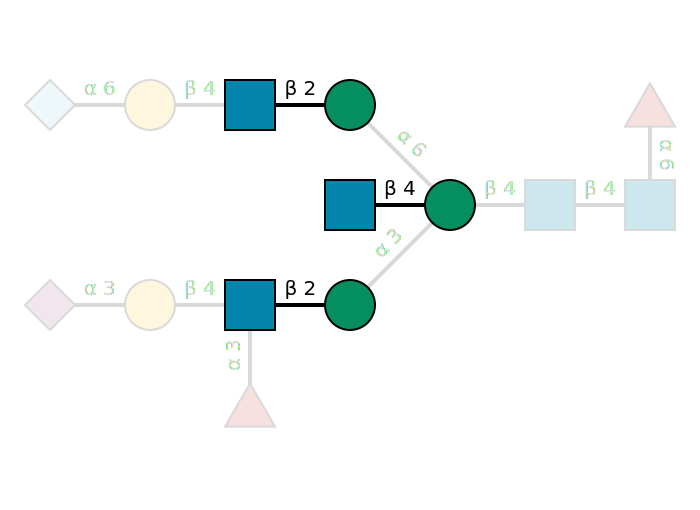

In [ ]:
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
         highlight_motif = "GlcNAc(b1-?)Man")

In [ ]:
show_doc(annotate_figure)

---

### annotate_figure

>      annotate_figure (svg_input:str, scale_range:Tuple[int,int]=(25, 80),
>                       compact:bool=False, glycan_size:str='medium',
>                       filepath:Union[str,pathlib.Path]='', scale_by_DE_res:Opt
>                       ional[pandas.core.frame.DataFrame]=None,
>                       x_thresh:float=1, y_thresh:float=0.05,
>                       x_metric:str='Log2FC')

*Replaces text labels with glycan drawings in SVG figure*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| svg_input | str |  | Input SVG file path |
| scale_range | Tuple | (25, 80) | Min/max glycan dimensions |
| compact | bool | False | Use compact style |
| glycan_size | str | medium | Glycan size preset ('small', 'medium', 'large') |
| filepath | Union |  | Output file path |
| scale_by_DE_res | Optional | None | Differential expression results (motif_analysis.get_differential_expression) |
| x_thresh | float | 1 | X metric threshold |
| y_thresh | float | 0.05 | P-value threshold |
| x_metric | str | Log2FC | X axis metric ('Log2FC', 'Effect size') |
| **Returns** | **Optional** |  | **Modified SVG code** |

In [ ]:
show_doc(plot_glycans_excel)

---

### plot_glycans_excel

>      plot_glycans_excel
>                          (df:Union[pandas.core.frame.DataFrame,str,pathlib.Pat
>                          h], folder_filepath:Union[str,pathlib.Path],
>                          glycan_col_num:int=0, scaling_factor:float=0.2,
>                          compact:bool=False)

*Creates Excel file with SNFG glycan images in a new column*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame or filepath with glycans |
| folder_filepath | Union |  | Output folder path |
| glycan_col_num | int | 0 | Glycan column index |
| scaling_factor | float | 0.2 | Image scaling |
| compact | bool | False | Use compact style |
| **Returns** | **None** |  |  |

## analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

---

### get_pvals_motifs

>      get_pvals_motifs (df:Union[pandas.core.frame.DataFrame,str],
>                        glycan_col_name:str='glycan',
>                        label_col_name:str='target', zscores:bool=True,
>                        thresh:float=1.645, sorting:bool=True,
>                        feature_set:List[str]=['exhaustive'],
>                        multiple_samples:bool=False,
>                        motifs:Optional[pandas.core.frame.DataFrame]=None,
>                        custom_motifs:List[str]=[])

*Identifies significantly enriched glycan motifs using Welch's t-test with FDR correction and Cohen's d effect size calculation, comparing samples above/below threshold*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | Input dataframe or filepath (.csv/.xlsx) |
| glycan_col_name | str | glycan | Column name for glycan sequences |
| label_col_name | str | target | Column name for labels |
| zscores | bool | True | Whether data are z-scores |
| thresh | float | 1.645 | Threshold to separate positive/negative |
| sorting | bool | True | Sort p-value dataframe |
| feature_set | List | ['exhaustive'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| multiple_samples | bool | False | Multiple samples with glycan columns |
| motifs | Optional | None | Modified motif_list |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| **Returns** | **DataFrame** |  | **DataFrame with p-values, FDR-corrected p-values, and Cohen's d effect sizes for glycan motifs** |

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]

Glyco-Motif enrichment p-value test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,motif,pval,corr_pval,effect_size
4,GlcNAc,0.038120,0.205849,1.530905
8,Man,0.054356,0.234990,1.390253
24,Man(a1-?)Man,0.060923,0.234990,1.308333
22,Man(a1-3)Man,0.034212,0.205849,1.196586
14,GlcNAc(b1-4)GlcNAc,0.019543,0.175885,1.168815
23,Man(a1-6)Man,0.019543,0.175885,1.168815
25,Man(b1-4)GlcNAc,0.019543,0.175885,1.168815
7,Kdo,0.328790,0.479672,-0.811679
2,Glc,0.644180,0.668956,-0.811679
21,Man(a1-2)Man,0.177461,0.479672,0.772320


In [ ]:
show_doc(get_representative_substructures)

---

### get_representative_substructures

>      get_representative_substructures
>                                        (enrichment_df:pandas.core.frame.DataFr
>                                        ame)

*Constructs minimal glycan structures that represent significantly enriched motifs by optimizing for motif content while minimizing structure size using subgraph isomorphism*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| enrichment_df | DataFrame | Output from get_pvals_motifs |
| **Returns** | **List** | **Up to 10 minimal glycans containing enriched motifs** |

In [ ]:
show_doc(get_heatmap)

---

### get_heatmap

>      get_heatmap (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                   motifs:bool=False, feature_set:List[str]=['known'],
>                   transform:str='', datatype:str='response',
>                   rarity_filter:float=0.05,
>                   filepath:Union[str,pathlib.Path]='', index_col:str='glycan',
>                   custom_motifs:List[str]=[], return_plot:bool=False,
>                   show_all:bool=False, **kwargs:Any)

*Creates hierarchically clustered heatmap visualization of glycan/motif abundances*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | Input dataframe or filepath (.csv/.xlsx) |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['known'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| transform | str |  | Transform data before plotting |
| datatype | str | response | Data type: 'response' for quantitative values or 'presence' for presence/absence |
| rarity_filter | float | 0.05 | Min proportion for non-zero values |
| filepath | Union |  | Path to save plot |
| index_col | str | glycan | Column to use as index |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| return_plot | bool | False | Return plot object |
| show_all | bool | False | Show all tick labels |
| kwargs | Any |  |  |
| **Returns** | **Optional** |  | **None or plot object if return_plot=True** |

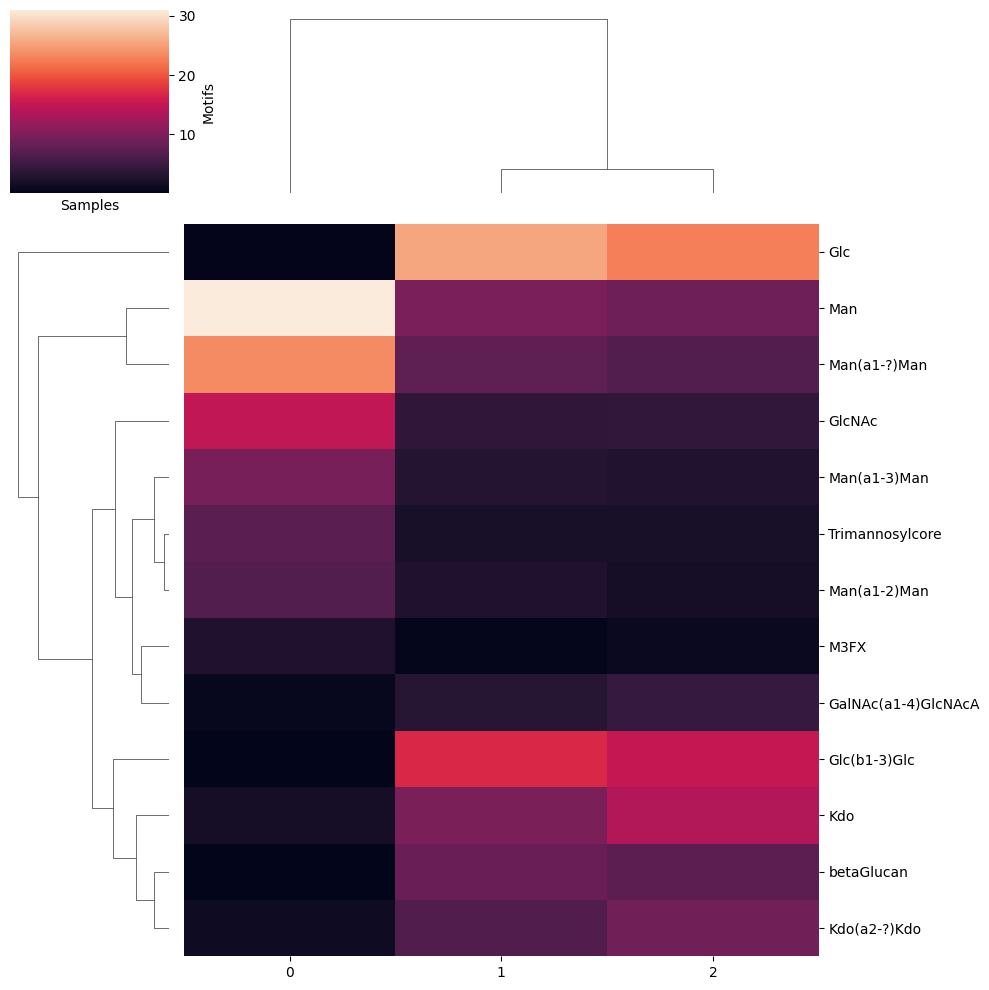

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

get_heatmap(test_df, motifs = True, feature_set = ['known', 'exhaustive'])

In [ ]:
show_doc(plot_embeddings)

---

### plot_embeddings

>      plot_embeddings (glycans:List[str], emb:Union[Dict[str,numpy.ndarray],pan
>                       das.core.frame.DataFrame,NoneType]=None,
>                       label_list:Optional[List[Any]]=None,
>                       shape_feature:Optional[str]=None,
>                       filepath:Union[str,pathlib.Path]='', alpha:float=0.8,
>                       palette:str='colorblind', **kwargs:Any)

*Visualizes learned glycan embeddings using t-SNE dimensionality reduction with optional group coloring*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | List |  | List of IUPAC-condensed glycan sequences |
| emb | Union | None | Glycan embeddings dict/DataFrame; defaults to SweetNet embeddings |
| label_list | Optional | None | Labels for coloring points |
| shape_feature | Optional | None | Monosaccharide/bond for point shapes |
| filepath | Union |  | Path to save plot |
| alpha | float | 0.8 | Point transparency |
| palette | str | colorblind | Color palette for groups |
| kwargs | Any |  |  |
| **Returns** | **None** |  | **Keyword args passed to seaborn scatterplot** |

Download completed.


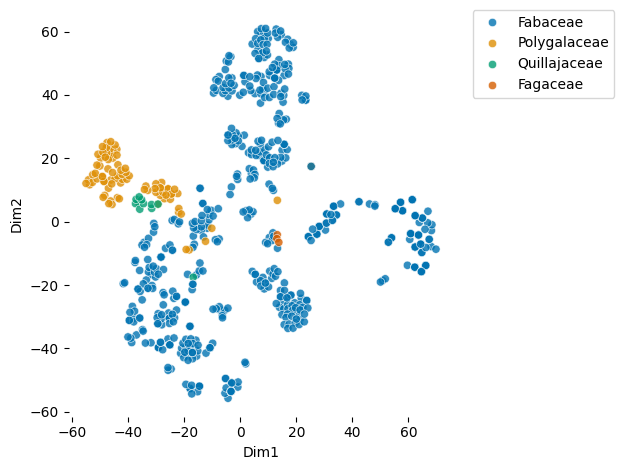

In [ ]:
df_fabales = df_species[df_species.Order == 'Fabales'].reset_index(drop = True)
plot_embeddings(df_fabales.glycan.values.tolist(), label_list = df_fabales.Family.values.tolist())

In [ ]:
show_doc(characterize_monosaccharide)

---

### characterize_monosaccharide

>      characterize_monosaccharide (sugar:str,
>                                   df:Optional[pandas.core.frame.DataFrame]=Non
>                                   e, mode:str='sugar',
>                                   glycan_col_name:str='glycan',
>                                   rank:Optional[str]=None,
>                                   focus:Optional[str]=None,
>                                   modifications:bool=False,
>                                   filepath:Union[str,pathlib.Path]='',
>                                   thresh:int=10)

*Analyzes connectivity and modification patterns of specified monosaccharides/linkages in glycan sequences*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| sugar | str |  | Monosaccharide or linkage to analyze |
| df | Optional | None | DataFrame with glycan column 'glycan'; defaults to df_species |
| mode | str | sugar | Analysis mode: 'sugar', 'bond', 'sugarbond' |
| glycan_col_name | str | glycan | Column name for glycan sequences |
| rank | Optional | None | Column name for group filtering |
| focus | Optional | None | Row value for group filtering |
| modifications | bool | False | Consider modified monosaccharides |
| filepath | Union |  | Path to save plot |
| thresh | int | 10 | Minimum count threshold for inclusion |
| **Returns** | **None** |  |  |

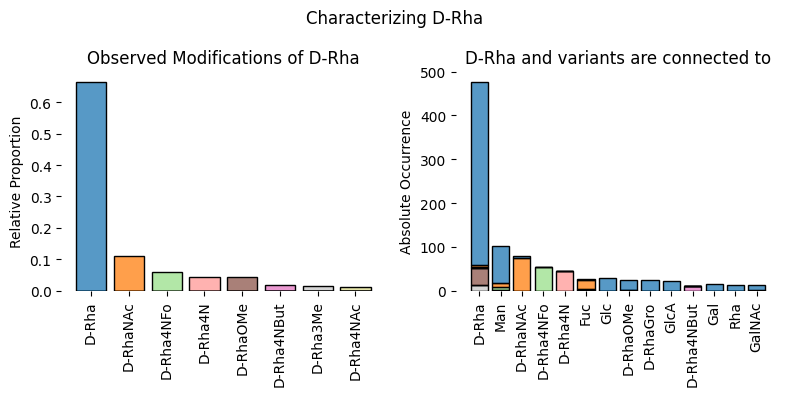

In [ ]:
characterize_monosaccharide('D-Rha', rank = 'Kingdom', focus = 'Bacteria', modifications = True)

In [ ]:
show_doc(get_differential_expression)

---

### get_differential_expression

>      get_differential_expression
>                                   (df:Union[pandas.core.frame.DataFrame,str,pa
>                                   thlib.Path], group1:List[Union[str,int]],
>                                   group2:List[Union[str,int]],
>                                   motifs:bool=False,
>                                   feature_set:List[str]=['exhaustive',
>                                   'known'], paired:bool=False,
>                                   impute:bool=True, sets:bool=False,
>                                   set_thresh:float=0.9,
>                                   effect_size_variance:bool=False,
>                                   min_samples:float=0.1,
>                                   grouped_BH:bool=False,
>                                   custom_motifs:List[str]=[],
>                                   transform:Optional[str]=None,
>                                   gamma:float=0.1,
>                                   custom_scale:Union[float,Dict]=0,
>                                   glycoproteomics:bool=False,
>                                   level:str='peptide', monte_carlo:bool=False)

*Performs differential expression analysis using Welch's t-test (or Hotelling's T2 for sets) with multiple testing correction on glycomics abundance data*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with glycans in rows (col 1) and abundance values in subsequent columns |
| group1 | List |  | Column indices/names for first group |
| group2 | List |  | Column indices/names for second group |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['exhaustive', 'known'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| paired | bool | False | Whether samples are paired |
| impute | bool | True | Replace zeros with Random Forest model |
| sets | bool | False | Identify clusters of correlated glycans |
| set_thresh | float | 0.9 | Correlation threshold for clusters |
| effect_size_variance | bool | False | Calculate effect size variance |
| min_samples | float | 0.1 | Min percent of non-zero samples required |
| grouped_BH | bool | False | Use two-stage adaptive Benjamini-Hochberg |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| custom_scale | Union | 0 | Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate) |
| glycoproteomics | bool | False | Whether data is from glycoproteomics |
| level | str | peptide | Analysis level for glycoproteomics |
| monte_carlo | bool | False | Use Monte Carlo for technical variation |
| **Returns** | **DataFrame** |  | **DataFrame with log2FC, p-values, FDR-corrected p-values, and Cohen's d/Mahalanobis distance effect sizes** |

In [ ]:
test_df = glycomics_data_loader.human_skin_O_PMC5871710_BCC

res = get_differential_expression(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)
res

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Glycan,Mean abundance,Log2FC,p-val,corr p-val,significant,corr Levene p-val,Effect size,Equivalence p-val
7,GalOS(b1-3)GalNAc,0.173949,-0.930987,0.000848,0.004936,True,0.915404,-0.884455,1.000000
0,H_antigen_type2,0.267917,-0.689804,0.002058,0.004936,True,0.940575,-0.797572,1.000000
1,Internal_LacNAc_type2,2.523308,0.467133,0.002552,0.004936,True,0.914891,0.776382,1.000000
8,GlcNAc6S(b1-6)GalNAc,1.134383,0.894961,0.002820,0.004936,True,0.915404,0.766511,1.000000
11,Neu5Ac(a2-3)Gal,13.418081,0.250839,0.004655,0.006517,True,0.940575,0.716794,1.000000
2,Terminal_LacNAc_type2,2.644059,-0.475258,0.007864,0.009174,True,0.915404,-0.664152,1.000000
13,Neu5Ac(a2-8)Neu5Ac,0.041972,-0.635599,0.018773,0.018773,True,0.914891,-0.574518,1.000000
9,Neu5Ac,17.999028,0.165081,0.048618,0.048618,False,0.915404,0.471179,1.000000
5,Gal,20.131266,0.111858,0.073880,0.073880,False,0.940575,0.422987,0.706775
10,Gal(b1-3)GalNAc,13.829516,0.095097,0.133433,0.133433,False,0.940575,0.350569,0.665561


In [ ]:
show_doc(get_volcano)

---

### get_volcano

>      get_volcano (df_res:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                   y_thresh:float=0.05, x_thresh:float=0, n:Optional[int]=None,
>                   label_changed:bool=True, x_metric:str='Log2FC',
>                   annotate_volcano:bool=False, filepath:str='', **kwargs:Any)

*Creates volcano plot showing -log10(FDR-corrected p-values) vs Log2FC or effect size*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df_res | Union |  | DataFrame from get_differential_expression with columns [Glycan, Log2FC, p-val, corr p-val] |
| y_thresh | float | 0.05 | Corrected p threshold for labeling |
| x_thresh | float | 0 | Absolute x metric threshold for labeling |
| n | Optional | None | Sample size for Bayesian-Adaptive Alpha |
| label_changed | bool | True | Add text labels to significant points |
| x_metric | str | Log2FC | x-axis metric: 'Log2FC' or 'Effect size' |
| annotate_volcano | bool | False | Annotate dots with SNFG images |
| filepath | str |  | Path to save plot |
| kwargs | Any |  |  |
| **Returns** | **None** |  | **Displays volcano plot** |

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


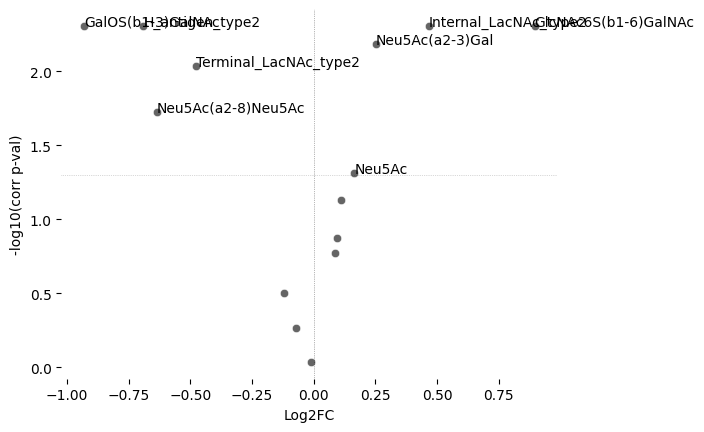

In [ ]:
get_volcano(res)

In [ ]:
show_doc(get_coverage)

---

### get_coverage

>      get_coverage (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                    filepath:str='')

*Visualizes glycan detection frequency across samples with intensity-based ordering*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with glycans in rows (col 1), abundances in columns |
| filepath | str |  | Path to save plot |
| **Returns** | **None** |  |  |

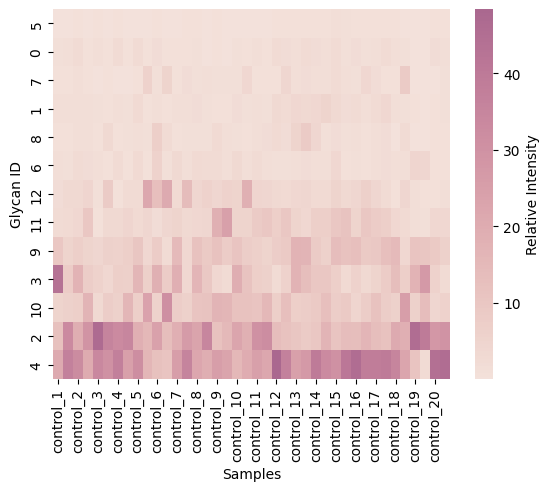

In [ ]:
test_df = pd.concat([test_df.iloc[:, 0], test_df[test_df.columns[1:]].astype(float)], axis = 1)

get_coverage(test_df)

In [ ]:
show_doc(get_pca)

---

### get_pca

>      get_pca (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>               groups:Union[List[int],pandas.core.frame.DataFrame,NoneType]=Non
>               e, motifs:bool=False, feature_set:List[str]=['known',
>               'exhaustive'], pc_x:int=1, pc_y:int=2, color:Optional[str]=None,
>               shape:Optional[str]=None, filepath:Union[str,pathlib.Path]='',
>               custom_motifs:List[str]=[], transform:Optional[str]=None,
>               rarity_filter:float=0.05)

*Performs PCA on glycan/motif abundance data with group-based visualization*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with glycans in rows (col 1), abundances in columns |
| groups | Union | None | Group labels (e.g., [1,1,1,2,2,2,3,3,3]) or metadata DataFrame with 'id' column |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['known', 'exhaustive'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| pc_x | int | 1 | Principal component for x-axis |
| pc_y | int | 2 | Principal component for y-axis |
| color | Optional | None | Column in metadata for color grouping |
| shape | Optional | None | Column in metadata for shape grouping |
| filepath | Union |  | Path to save plot |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| rarity_filter | float | 0.05 | Min proportion for non-zero values |
| **Returns** | **None** |  |  |

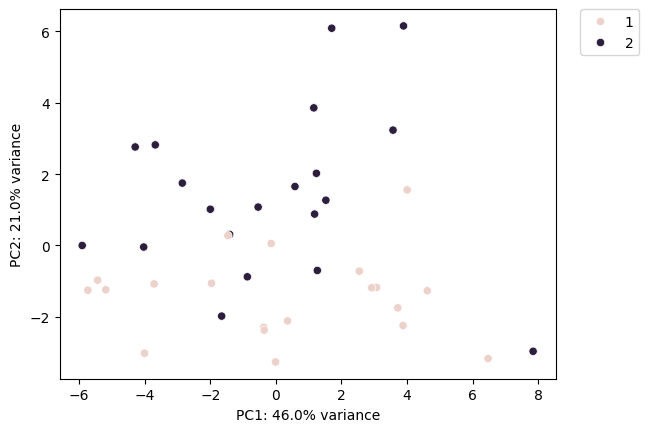

In [ ]:
get_pca(test_df, motifs = True, groups = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2])

In [ ]:
show_doc(get_pval_distribution)

---

### get_pval_distribution

>      get_pval_distribution
>                             (df_res:Union[pandas.core.frame.DataFrame,str,path
>                             lib.Path], filepath:Union[str,pathlib.Path]='')

*Creates histogram of p-values from differential expression analysis*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df_res | Union |  | Output DataFrame from get_differential_expression |
| filepath | Union |  | Path to save plot |
| **Returns** | **None** |  |  |

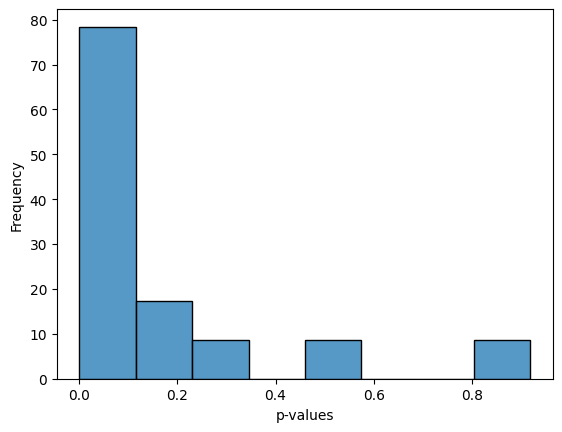

In [ ]:
get_pval_distribution(res)

In [ ]:
show_doc(get_ma)

---

### get_ma

>      get_ma (df_res:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>              log2fc_thresh:int=1, sig_thresh:float=0.05,
>              filepath:Union[str,pathlib.Path]='')

*Generates MA plot (mean abundance vs log2 fold change) from differential expression results*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df_res | Union |  | Output DataFrame from get_differential_expression |
| log2fc_thresh | int | 1 | Log2FC threshold for highlighting |
| sig_thresh | float | 0.05 | Significance threshold for highlighting |
| filepath | Union |  | Path to save plot |
| **Returns** | **None** |  |  |

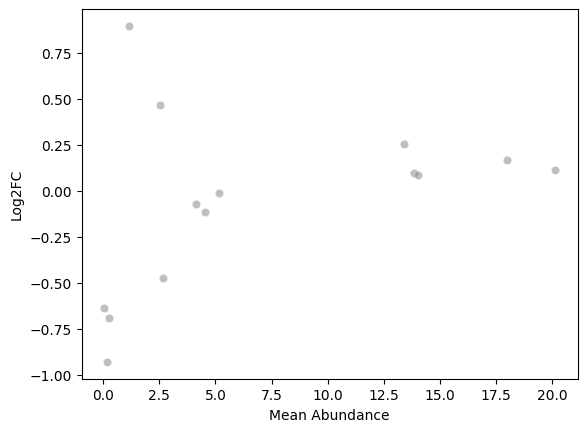

In [ ]:
get_ma(res)

In [ ]:
show_doc(get_glycanova)

---

### get_glycanova

>      get_glycanova (df:Union[pandas.core.frame.DataFrame,str],
>                     groups:List[Any], impute:bool=True, motifs:bool=False,
>                     feature_set:List[str]=['exhaustive', 'known'],
>                     min_samples:float=0.1, posthoc:bool=True,
>                     custom_motifs:List[str]=[], transform:Optional[str]=None,
>                     gamma:float=0.1, custom_scale:float=0)

*Performs one-way ANOVA with omega-squared effect size calculation and optional Tukey's HSD post-hoc testing on glycomics data across multiple groups*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with glycans in rows (col 1) and abundance values in columns |
| groups | List |  | Group labels for samples (e.g., [1,1,1,2,2,2,3,3,3]) |
| impute | bool | True | Replace zeros with Random Forest model |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['exhaustive', 'known'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| min_samples | float | 0.1 | Min percent of non-zero samples required |
| posthoc | bool | True | Perform Tukey's HSD test post-hoc |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| custom_scale | float | 0 | Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate) |
| **Returns** | **Tuple** |  | **(ANOVA results with F-stats and omega-squared effect sizes, post-hoc results)** |

In [ ]:
test_df2 = glycomics_data_loader.HIV_gagtransfection_O_PMID35112714

anv, ph = get_glycanova(test_df2, [1,1,1,1,2,2,2,2,3,3,3,3], motifs = False)
anv

You're working with an alpha of 0.06364810000741428 that has been adjusted for your sample size of 12.


,Glycan,F statistic,p-val,corr p-val,significant,Effect size
0,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,3.337354,0.082356,0.255515,False,0.182074
1,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.264846,0.159697,0.255515,False,0.107511
2,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,2.987894,0.101120,0.255515,False,-0.097792
3,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,4.902553,0.036295,0.255515,False,0.159186
7,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-...,2.442388,0.142124,0.255515,False,-0.072202
4,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3/6)[GlcNAc(b1-...,1.346603,0.307886,0.368114,False,0.270963
5,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,1.288259,0.322100,0.368114,False,0.031955
6,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)...,0.292927,0.752927,0.752927,False,0.026720
8,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0.000000,1.000000,1.000000,False,0.120779


In [ ]:
show_doc(get_meta_analysis)

---

### get_meta_analysis

>      get_meta_analysis (effect_sizes:Union[numpy.ndarray,List[float]],
>                         variances:Union[numpy.ndarray,List[float]],
>                         model:str='fixed', filepath:str='',
>                         study_names:List[str]=[])

*Performs fixed/random effects meta-analysis using DerSimonian-Laird method for between-study variance estimation, with optional Forest plot visualization*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| effect_sizes | Union |  | List of Cohen's d/other effect sizes |
| variances | Union |  | Associated variance estimates |
| model | str | fixed | 'fixed' or 'random' effects model |
| filepath | str |  | Path to save Forest plot |
| study_names | List | [] | Names corresponding to each effect size |
| **Returns** | **Tuple** |  | **(combined effect size, two-tailed p-value)** |

In [ ]:
get_meta_analysis([-8.759, -6.363, -5.199, -3.952],
                 [7.061, 4.041, 2.919, 1.968])

(-5.326913553837341, 3.005077298112724e-09)

In [ ]:
show_doc(get_time_series)

---

### get_time_series

>      get_time_series (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                       impute:bool=True, motifs:bool=False,
>                       feature_set:List[str]=['known', 'exhaustive'],
>                       degree:int=1, min_samples:float=0.1,
>                       custom_motifs:List[str]=[],
>                       transform:Optional[str]=None, gamma:float=0.1,
>                       custom_scale:Union[float,Dict]=0)

*Analyzes time series glycomics data using polynomial regression*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with sample IDs as 'sampleID_timepoint_replicate' in col 1 (e.g., T1_h5_r1) |
| impute | bool | True | Replace zeros with Random Forest model |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['known', 'exhaustive'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| degree | int | 1 | Polynomial degree for regression |
| min_samples | float | 0.1 | Min percent of non-zero samples required |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| custom_scale | Union | 0 | Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate) |
| **Returns** | **DataFrame** |  | **DataFrame with regression coefficients and FDR-corrected p-values** |

In [ ]:
t_dic = {}
t_dic["ID"] = ["D1_h5_r1", "D1_h5_r2", "D1_h5_r3", "D1_h10_r1", "D1_h10_r2", "D1_h10_r3", "D1_h15_r1", "D1_h15_r2", "D1_h15_r3"]
t_dic["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc"] = [0.33, 0.31, 0.35, 1.51, 1.57, 1.66, 2.11, 2.04, 2.09]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [0.78, 1.01, 0.98, 0.88, 1.11, 0.72, 1.22, 1.00, 0.54]
t_dic["Neu5Ac(a2-6)GalNAc"] = [0.11, 0.09, 0.14, 0.02, 0.07, 0.10, 0.11, 0.09, 0.08]
get_time_series(pd.DataFrame(t_dic).set_index("ID").T)

You're working with an alpha of 0.0694557066556809 that has been adjusted for your sample size of 9.


,Glycan,Change,p-val,corr p-val,significant
0,Fuc(a1-2)Gal(b1-3)GalNAc,-0.009300,0.415220,0.633796,False
1,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,0.005395,0.422530,0.633796,False
2,Neu5Ac(a2-6)GalNAc,-0.001835,0.843457,0.843457,False


In [ ]:
show_doc(get_jtk)

---

### get_jtk

>      get_jtk (df_in:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>               timepoints:int, interval:int, periods:List[int]=[12, 24],
>               motifs:bool=False, feature_set:List[str]=['known', 'exhaustive',
>               'terminal'], custom_motifs:List[str]=[],
>               transform:Optional[str]=None, gamma:float=0.1,
>               correction_method:str='two-stage')

*Identifies rhythmically expressed glycans using Jonckheere-Terpstra-Kendall algorithm for time series analysis*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df_in | Union |  | DataFrame with molecules in rows (col 0), then groups arranged by ascending timepoints |
| timepoints | int |  | Number of timepoints (each must have same number of replicates) |
| interval | int |  | Time units between experimental timepoints |
| periods | List | [12, 24] | Timepoints per cycle to test |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['known', 'exhaustive', 'terminal'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| correction_method | str | two-stage | Multiple testing correction method |
| **Returns** | **DataFrame** |  | **DataFrame with JTK results: adjusted p-values, period length, lag phase, amplitude** |

In [ ]:
t_dic = {}
t_dic["Neu5Ac(a2-3)Gal(b1-3)GalNAc"] = [0.433138901, 0.149729209, 0.358018822, 0.537641256, 1.526963756, 1.349986672, 0.75156406, 0.736710183]
t_dic["Gal(b1-3)GalNAc"] = [0.919762334, 0.760237184, 0.725566662, 0.459945797, 0.523801515, 0.695106926, 0.627632047, 1.183511209]
t_dic["Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"] = [0.533138901, 0.119729209, 0.458018822, 0.637641256, 1.726963756, 1.249986672, 0.55156406, 0.436710183]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [3.862169504, 5.455032837, 3.858163289, 5.614650335, 3.124254095, 4.189550337, 4.641831312, 4.19538484]
tps = 8  # number of timepoints in experiment
periods = [8]  # potential cycles to test
interval = 3  # units of time between experimental timepoints
t_df = pd.DataFrame(t_dic).T
t_df.columns = ["T3", "T6", "T9", "T12", "T15", "T18", "T21", "T24"]
get_jtk(t_df.reset_index(), tps, interval, periods = periods)

You're working with an alpha of 0.22004505213567527 that has been adjusted for your sample size of 1.
Significance inflation detected. The CLR/ALR transformation possibly cannot handle this dataset. Consider running again with a higher gamma value.             Proceed with caution; for now switching to Bonferroni correction to be conservative about this.


,Molecule_Name,Adjusted_P_value,Period_Length,Lag_Phase,Amplitude,significant
0,Gal(b1-3)GalNAc,0.037499,8,12,0.785714,False
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.037499,8,12,0.785714,False
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0.431049,8,9,0.500000,False
3,Fuc(a1-2)Gal(b1-3)GalNAc,0.694185,8,9,0.428571,False


In [ ]:
get_jtk(t_df.reset_index(), tps, interval, periods = periods, motifs = True, feature_set = ['terminal'])

You're working with an alpha of 0.22004505213567527 that has been adjusted for your sample size of 1.


,Molecule_Name,Adjusted_P_value,Period_Length,Lag_Phase,Amplitude,significant
0,Terminal_Neu5Ac(a2-6),0.059080,8,12,0.642857,True
1,Terminal_Gal(b1-3),0.059080,8,3,0.642857,True
2,Terminal_Neu5Ac(a2-?),0.059080,8,12,0.714286,True
3,Terminal_Neu5Ac(a2-3),0.216933,8,9,0.428571,True
4,Terminal_Fuc(a1-2),0.386476,8,3,0.285714,False


In [ ]:
show_doc(get_biodiversity)

---

### get_biodiversity

>      get_biodiversity (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                        group1:List[Union[str,int]],
>                        group2:List[Union[str,int]],
>                        metrics:List[str]=['alpha', 'beta'], motifs:bool=False,
>                        feature_set:List[str]=['exhaustive', 'known'],
>                        custom_motifs:List[str]=[], paired:bool=False,
>                        permutations:int=999, transform:Optional[str]=None,
>                        gamma:float=0.1, custom_scale:Union[float,Dict]=0)

*Calculates alpha (Shannon/Simpson) and beta (ANOSIM/PERMANOVA) diversity measures from glycomics data*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with glycans in rows (col 1), abundances in columns |
| group1 | List |  | First group column indices or group labels |
| group2 | List |  | Second group indices or additional group labels |
| metrics | List | ['alpha', 'beta'] | Diversity metrics to calculate |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['exhaustive', 'known'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| paired | bool | False | Whether samples are paired |
| permutations | int | 999 | Number of permutations for ANOSIM/PERMANOVA |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| custom_scale | Union | 0 | Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate) |
| **Returns** | **DataFrame** |  | **DataFrame with diversity indices and test statistics** |

In [ ]:
res = get_biodiversity(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)
res

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Metric,Group1 mean,Group2 mean,p-val,Effect size,corr p-val,significant
0,simpson_diversity,0.862282,0.859129,0.000563,-0.924643,0.000563,True
1,shannon_diversity,2.138053,2.116661,0.001465,-0.830953,0.001465,True
2,Beta diversity (ANOSIM),NaN,NaN,0.003003,0.147526,0.003003,True
3,Beta diversity (PERMANOVA),NaN,NaN,0.003003,43.731827,0.003003,True
4,species_richness,14.000000,14.000000,1.000000,0.000000,1.000000,False


In [ ]:
show_doc(get_SparCC)

---

### get_SparCC

>      get_SparCC (df1:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                  df2:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                  motifs:bool=False, feature_set:List[str]=['known',
>                  'exhaustive'], custom_motifs:List[str]=[],
>                  transform:Optional[str]=None, gamma:float=0.1,
>                  partial_correlations:bool=False)

*Calculates SparCC (Sparse Correlations for Compositional Data) between two matching datasets (e.g., glycomics)*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df1 | Union |  | First DataFrame with glycans in rows (col 1) and abundances in columns |
| df2 | Union |  | Second DataFrame with same format as df1 |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['known', 'exhaustive'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| partial_correlations | bool | False | Use regularized partial correlations |
| **Returns** | **Tuple** |  | **(Spearman correlation matrix, FDR-corrected p-value matrix)** |

You're working with an alpha of 0.04787928055709467 that has been adjusted for your sample size of 31.


<seaborn.matrix.ClusterGrid>

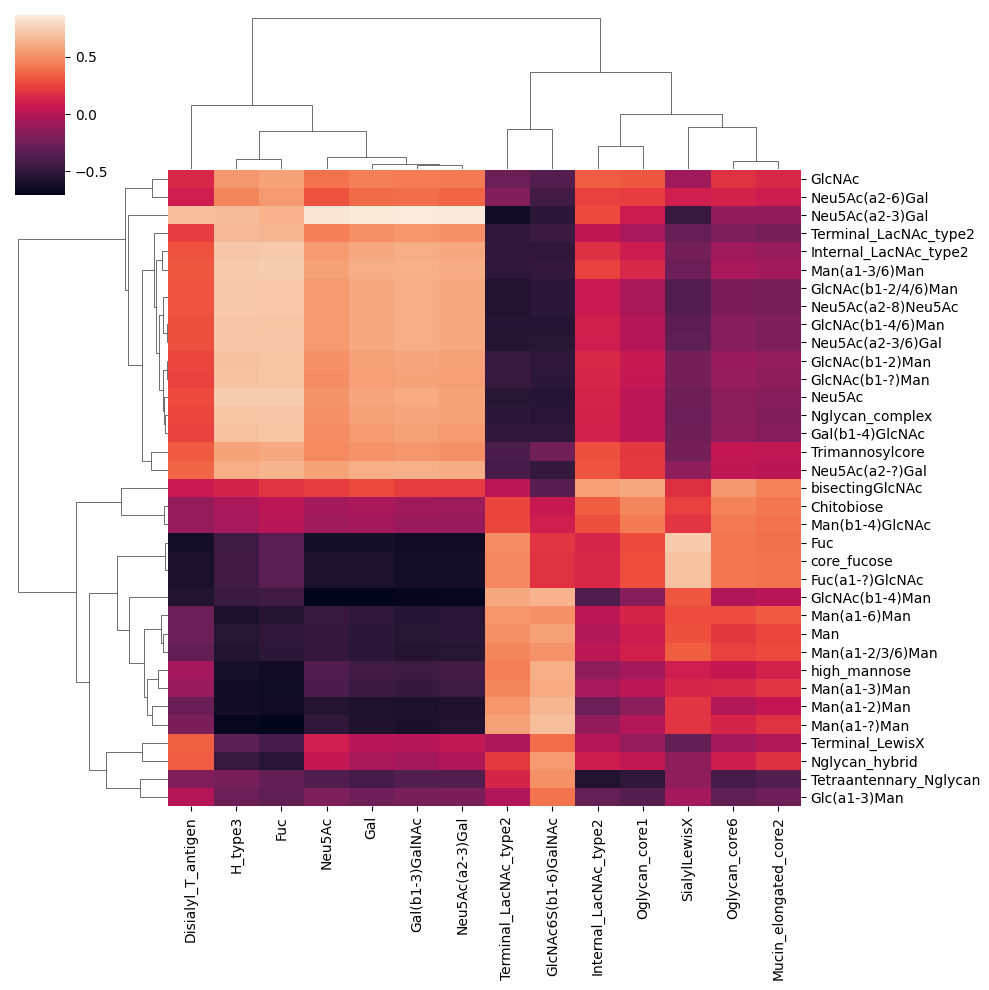

In [ ]:
df1 = glycomics_data_loader.time_series_N_PMID32149347
df2 = glycomics_data_loader.time_series_O_PMID32149347
df1 = pd.merge(df1, df2[['ID']], on = 'ID', how = 'inner')
df2 = pd.merge(df2, df1[['ID']], on = 'ID', how = 'inner')
df1 = df1.set_index(df1.columns.tolist()[0]).T.reset_index()
df2 = df2.set_index(df2.columns.tolist()[0]).T.reset_index()

corr, pval = get_SparCC(df1, df2, motifs = True, transform = "CLR")
sns.clustermap(corr)

In [ ]:
show_doc(get_roc)

---

### get_roc

>      get_roc (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>               group1:List[Union[str,int]], group2:List[Union[str,int]],
>               motifs:bool=False, feature_set:List[str]=['known',
>               'exhaustive'], paired:bool=False, impute:bool=True,
>               min_samples:float=0.1, custom_motifs:List[str]=[],
>               transform:Optional[str]=None, gamma:float=0.1,
>               custom_scale:Union[float,Dict]=0,
>               filepath:Union[str,pathlib.Path]='', multi_score:bool=False)

*Calculates ROC curves and AUC scores for glycans/motifs or multi-glycan classifiers*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with glycans in rows (col 1), abundances in columns |
| group1 | List |  | First group indices/names |
| group2 | List |  | Second group indices/names |
| motifs | bool | False | Analyze motifs instead of sequences |
| feature_set | List | ['known', 'exhaustive'] | Feature sets to use; exhaustive/known/terminal1/terminal2/terminal3/chemical/graph/custom/size_branch |
| paired | bool | False | Whether samples are paired |
| impute | bool | True | Replace zeros with Random Forest model |
| min_samples | float | 0.1 | Min percent of non-zero samples required |
| custom_motifs | List | [] | Custom motifs if using 'custom' feature set |
| transform | Optional | None | Transformation type: "CLR" or "ALR" |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| custom_scale | Union | 0 | Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate) |
| filepath | Union |  | Path to save ROC plot |
| multi_score | bool | False | Find best multi-glycan score |
| **Returns** | **Union** |  | **(Feature scores with ROC AUC values)** |

[('GlcNAc6S(b1-6)GalNAc', 0.7599999999999999),
 ('Internal_LacNAc_type2', 0.715),
 ('Neu5Ac(a2-3)Gal', 0.6699999999999999),
 ('Neu5Ac', 0.65),
 ('Gal', 0.6),
 ('Gal(b1-3)GalNAc', 0.5874999999999999),
 ('GalNAc', 0.585),
 ('Oglycan_core6', 0.4975),
 ('Disialyl_T_antigen', 0.465),
 ('Neu5Ac(a2-6)GalNAc', 0.45),
 ('Neu5Ac(a2-8)Neu5Ac', 0.37000000000000005),
 ('H_antigen_type2', 0.2625),
 ('Terminal_LacNAc_type2', 0.2625),
 ('GalOS(b1-3)GalNAc', 0.2475)]

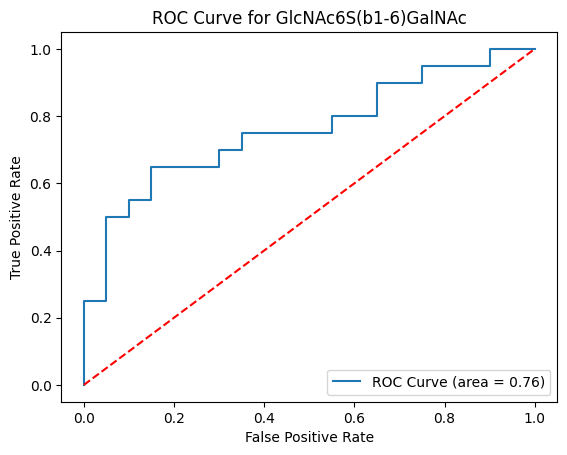

In [ ]:
get_roc(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)

In [ ]:
show_doc(get_lectin_array)

---

### get_lectin_array

>      get_lectin_array (df:Union[pandas.core.frame.DataFrame,str,pathlib.Path],
>                        group1:List[Union[str,int]],
>                        group2:List[Union[str,int]], paired:bool=False,
>                        transform:str='')

*Analyzes lectin microarray data by mapping lectin binding patterns to glycan motifs, calculating Cohen's d effect sizes between groups and clustering results by significance*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with samples as rows and lectins as columns, first column containing sample IDs |
| group1 | List |  | First group indices/names |
| group2 | List |  | Second group indices/names |
| paired | bool | False | Whether samples are paired |
| transform | str |  | Optional log2 transformation |
| **Returns** | **DataFrame** |  | **DataFrame with altered glycan motifs, supporting lectins, and effect sizes** |

In [ ]:
lectin_df = lectin_array_data_loader.A549_influenza_PMID33046650
get_lectin_array(lectin_df, [5,6,7], [8,9,10])

Lectin "Ab-LeB-1" is not found in our annotated lectin library and is excluded from analysis.
Lectin "APA" is not found in our annotated lectin library and is excluded from analysis.
Lectin "APP" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Blood Group B [CLCP-19B]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Blood Group H2" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CA19-9 [121SLE]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CCA" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [ICRF29-2]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [MY-1]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [SP-159]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Forssman" is not found 

,motif,named_motifs,lectin(s),change,score,significance
39,Neu5Ac(a2-6)Gal(b1-3)GlcNAc,[Internal_LacNAc_type1],"PSL, SNA, TJA-I, BDA, BPA, WGA_1, WGA_2",down,11.32,highly significant
38,Neu5Ac(a2-6)Gal(b1-4)GlcNAc,[Internal_LacNAc_type2],"PSL, SNA, TJA-I, BDA, BPA, ECA, RCA120, Ricin ...",down,10.81,highly significant
7,Man(a1-2),[],"ASA, Con A, CVN, HHL, SVN_1, GRFT, SVN_2, SNA-...",up,4.83,moderately significant
14,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,"[Chitobiose, Trimannosylcore, Terminal_LacNAc_...","CA, CAA, DSA_1, DSA_2, DSA_3, AMA, BDA, BPA, C...",up,3.51,moderately significant
4,Gal(b1-3)GalNAc,[],"ACA, AIA, MPA, PNA_1, PNA_2, BDA, BPA",up,3.48,moderately significant
43,Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc,[Internal_LacdiNAc_type2],"SNA, CSA, SBA, VVA_1, VVA_2, WFA, BPA, ECA, ST...",down,2.86,moderately significant
10,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-4)][G...,"[Chitobiose, Trimannosylcore, Terminal_LacNAc_...","Blackbean, Calsepa, PHA-E_1, PHA-E_2, AMA, BDA...",up,2.70,moderately significant
16,Fuc(a1-2)Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Ga...,"[Internal_LacNAc_type2, H_type3]","Cholera Toxin, AAA, AAL, ACA, AIA, AOL, BDA, B...",up,2.51,moderately significant
15,Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Gal(b1-4)Gl...,[Internal_LacNAc_type2],"Cholera Toxin, ACA, AIA, BDA, BPA, CSA, ECA, L...",up,2.46,moderately significant
47,GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...,"[Chitobiose, Trimannosylcore, core_fucose, Ngl...","TL, AAL, AMA, AOL, Con A, GNA, GNL, HHL, LcH, ...",up,2.36,moderately significant


In [ ]:
show_doc(get_glycoshift_per_site)

---

### get_glycoshift_per_site

>      get_glycoshift_per_site
>                               (df:Union[pandas.core.frame.DataFrame,str,pathli
>                               b.Path], group1:List[Union[str,int]],
>                               group2:List[Union[str,int]], paired:bool=False,
>                               impute:bool=True, min_samples:float=0.2,
>                               gamma:float=0.1,
>                               custom_scale:Union[float,Dict]=0)

*Analyzes site-specific glycosylation changes in glycoproteomics data using generalized linear models (GLM) with compositional data normalization*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame with rows formatted as 'protein_site_composition' in col 1, abundances in remaining cols |
| group1 | List |  | First group indices/names or group labels for multi-group |
| group2 | List |  | Second group indices/names |
| paired | bool | False | Whether samples are paired |
| impute | bool | True | Replace zeros with Random Forest model |
| min_samples | float | 0.2 | Min percent of non-zero samples required |
| gamma | float | 0.1 | Uncertainty parameter for CLR transform |
| custom_scale | Union | 0 | Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate) |
| **Returns** | **DataFrame** |  | **DataFrame with GLM coefficients and FDR-corrected p-values** |

In [ ]:
df_milk = glycoproteomics_data_loader.human_milk_N_PMID34087070

get_glycoshift_per_site(df_milk, ['Colostrum1', 'Colostrum2', 'Colostrum3'], ['Mature1', 'Mature2', 'Mature3'])

You're working with an alpha of 0.07862467893233027 that has been adjusted for your sample size of 6.


,Condition_coefficient,Condition_corr_pval,Condition_significant,dHex_Condition_coefficient,dHex_Condition_corr_pval,dHex_Condition_significant,hybrid_Condition_coefficient,hybrid_Condition_corr_pval,hybrid_Condition_significant,high_Man_Condition_coefficient,...,HexNAc_Condition_significant,Hex_Condition_coefficient,Hex_Condition_corr_pval,Hex_Condition_significant,Neu5Ac_Condition_coefficient,Neu5Ac_Condition_corr_pval,Neu5Ac_Condition_significant,antennary_Fuc_Condition_coefficient,antennary_Fuc_Condition_corr_pval,antennary_Fuc_Condition_significant
sp|P47710|CASA1_69,0.351306,0.000000e+00,True,3.651421,0.000000e+00,True,0.351306,0.000000e+00,True,0.000000,...,True,-1.543583,0.000000e+00,True,0.351306,0.000000e+00,True,0.000000,1.000000e+00,False
sp|P01024|CO3_85,-13.741464,0.000000e+00,True,0.000000,1.000000e+00,False,-13.741464,0.000000e+00,True,-13.741464,...,True,12.821387,0.000000e+00,True,0.000000,1.000000e+00,False,0.000000,1.000000e+00,False
sp|P10909|CLUS_103,-0.148812,0.000000e+00,True,-0.148812,0.000000e+00,True,-4.609878,0.000000e+00,True,0.000000,...,True,-0.744062,0.000000e+00,True,4.312254,0.000000e+00,True,0.000000,1.000000e+00,False
sp|Q13410|BT1A1_55,-13.032160,1.632815e-86,True,0.530115,4.007150e-01,False,-8.873947,1.136641e-42,True,0.000000,...,True,-0.631943,1.290904e-18,True,-17.190373,1.192223e-132,True,-13.621108,2.312512e-126,True
sp|P01011|AACT_106,-0.027180,8.973881e-15,True,2.502612,0.000000e+00,True,2.529792,0.000000e+00,True,0.000000,...,True,-0.135901,8.973881e-15,True,-2.584152,0.000000e+00,True,2.529792,0.000000e+00,True
sp|P00709|LALBA_90,-1.256621,1.737034e-08,True,7.335961,2.957124e-28,True,-0.701834,4.151344e-01,False,0.000000,...,True,3.643645,1.656325e-06,True,-1.811408,4.231494e-06,True,-1.295395,5.342502e-01,False
sp|P02749|APOH_253,-0.002492,2.356643e-06,True,0.000000,1.000000e+00,False,0.000000,1.000000e+00,False,0.000000,...,True,-0.012460,2.356643e-06,True,-0.004984,3.167328e-06,True,0.000000,1.000000e+00,False
sp|P00738|HPT_241,0.001144,1.133736e-04,True,0.000000,1.000000e+00,False,0.000000,1.000000e+00,False,0.000000,...,True,0.005722,1.133736e-04,True,0.002289,1.243870e-04,True,0.000000,1.000000e+00,False
sp|P02765|FETUA_156,-0.002672,3.394518e-03,True,0.000000,1.000000e+00,False,0.000000,1.000000e+00,False,0.000000,...,True,-0.013358,3.394518e-03,True,-0.005343,3.666080e-03,True,0.000000,1.000000e+00,False
sp|P01871|IGHM_46,-0.000319,7.588850e-02,True,-0.000319,1.214216e-01,False,-0.000319,9.443902e-02,False,0.000000,...,True,-0.001594,7.588850e-02,True,-0.000319,5.604074e-02,True,0.000000,1.000000e+00,False


## annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(annotate_glycan)

---

### annotate_glycan

>      annotate_glycan (glycan:Union[str,networkx.classes.digraph.DiGraph],
>                       motifs:Optional[pandas.core.frame.DataFrame]=None,
>                       termini_list:List=[], gmotifs:Optional[List[networkx.cla
>                       sses.digraph.DiGraph]]=None)

*Counts occurrences of known motifs in a glycan structure using subgraph isomorphism*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | Union |  | IUPAC-condensed glycan sequence or NetworkX graph |
| motifs | Optional | None | Motif dataframe (name + sequence); defaults to motif_list |
| termini_list | List | [] | Monosaccharide positions: 'terminal', 'internal', or 'flexible' |
| gmotifs | Optional | None | Precalculated motif graphs for speed |
| **Returns** | **DataFrame** |  | **DataFrame with motif counts for the glycan** |

In [ ]:
annotate_glycan("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,...,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core,DisialylLewisC,RM2,DisialylLewisA
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(annotate_dataset)

---

### annotate_dataset

>      annotate_dataset (glycans:List[str],
>                        motifs:Optional[pandas.core.frame.DataFrame]=None,
>                        feature_set:List[str]=['known'], termini_list:List=[],
>                        condense:bool=False, custom_motifs:List=[])

*Comprehensive glycan annotation combining multiple feature types: structural motifs, graph properties, terminal sequences*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | List |  | List of IUPAC-condensed glycan sequences |
| motifs | Optional | None | Motif dataframe (name + sequence); defaults to motif_list |
| feature_set | List | ['known'] | Feature types to analyze: known, graph, exhaustive, terminal(1-3), custom, chemical, size_branch |
| termini_list | List | [] | Monosaccharide positions: 'terminal', 'internal', or 'flexible' |
| condense | bool | False | Remove columns with only zeros |
| custom_motifs | List | [] | Custom motifs when using 'custom' feature set |
| **Returns** | **DataFrame** |  | **DataFrame mapping glycans to presence/absence of motifs** |

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
print("Annotate Test")
out = annotate_dataset(glycans)

Annotate Test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,H_antigen_type2,H_antigen_type1,H_antigen_type3,A_antigen,A_antigen_type1,A_antigen_type2,A_antigen_type3,B_antigen,B_antigen_type1,B_antigen_type2,ExtB,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyaluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,Sda,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core1,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core,DisialylLewisC,RM2,DisialylLewisA
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(quantify_motifs)

---

### quantify_motifs

>      quantify_motifs (df:Union[str,pandas.core.frame.DataFrame],
>                       glycans:List[str], feature_set:List[str],
>                       custom_motifs:List=[], remove_redundant:bool=True)

*Extracts and quantifies motif abundances from glycan abundance data by weighting motif occurrences*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | Union |  | DataFrame or filepath with samples as columns, abundances as values |
| glycans | List |  | List of IUPAC-condensed glycan sequences |
| feature_set | List |  | Feature types to analyze: known, graph, exhaustive, terminal(1-3), custom, chemical, size_branch |
| custom_motifs | List | [] | Custom motifs when using 'custom' feature set |
| remove_redundant | bool | True | Remove redundant motifs via deduplicate_motifs |
| **Returns** | **DataFrame** |  | **DataFrame with motif abundances (motifs as columns, samples as rows)** |

In [ ]:
quantify_motifs(test_df.iloc[:, 1:], test_df.iloc[:, 0].values.tolist(), ['known', 'exhaustive'])

,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,...,control_16,tumor_16,control_17,tumor_17,control_18,tumor_18,control_19,tumor_19,control_20,tumor_20
H_antigen_type2,1.347737,0.892651,2.468405,1.810795,1.589162,0.449339,2.640132,0.572828,2.763890,0.737076,...,1.070249,0.647786,1.440912,1.810304,1.722289,1.475260,4.847788,4.552496,0.480035,0.494123
Internal_LacNAc_type2,8.845085,10.063160,13.435501,28.834006,5.585973,11.359659,11.672584,21.193308,12.734919,28.597709,...,10.883437,17.991155,21.166792,16.161351,11.909325,29.924308,12.820872,19.107379,8.802443,10.268911
Terminal_LacNAc_type2,52.982192,13.183951,24.413523,12.870782,9.555884,9.822266,12.628910,13.916662,26.569737,10.733867,...,18.779972,12.157928,14.828507,20.879287,27.689619,10.734756,28.328965,37.870847,14.835019,8.910804
Disialyl_T_antigen,20.803836,36.895471,32.803297,20.401157,33.971366,30.150599,37.703636,24.728411,31.798990,15.989214,...,46.337629,39.476930,39.087708,40.348217,35.791797,22.968160,11.026029,2.613718,44.676379,46.125360
Oglycan_core6,61.827277,23.247111,37.849024,41.704788,15.141858,21.181925,24.301494,35.109970,39.304656,39.331576,...,29.663409,30.149083,35.995300,37.040638,39.598944,40.659064,41.149838,56.978227,23.637462,19.179715
Gal,163.691481,126.500106,141.895063,147.702533,115.056369,132.721945,122.804259,138.398297,141.412183,167.203077,...,133.838024,140.218313,142.530133,139.697255,138.848449,154.791018,142.588964,157.426027,122.916027,120.555251
GalNAc,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
GalOS(b1-3)GalNAc,0.843710,1.185047,2.152084,0.687093,1.564450,0.381914,2.389590,0.533142,2.497482,0.338889,...,2.066978,1.088630,1.462826,2.259636,1.687785,1.137672,0.024033,0.117449,1.972512,1.304717
GlcNAc6S(b1-6)GalNAc,2.707913,4.438043,6.198123,6.684838,1.478960,11.921934,0.892356,3.821469,4.605009,28.210391,...,6.241593,11.157860,7.997660,4.916252,0.937290,15.269626,1.463159,0.565249,1.251077,2.680253
Neu5Ac,80.494155,134.094482,120.708503,125.892731,128.626161,137.543517,132.135127,124.740497,118.279272,134.227059,...,149.089683,152.360772,145.124475,140.251427,125.331418,121.962226,91.599064,72.000898,142.956534,148.579697


In [ ]:
show_doc(get_k_saccharides)

---

### get_k_saccharides

>      get_k_saccharides (glycans:Union[List[str],Set[str]], size:int=2,
>                         up_to:bool=False, just_motifs:bool=False,
>                         terminal:bool=False)

*Extracts k-saccharide fragments from glycan sequences with options for different fragment sizes and positions*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | Union |  | List or set of IUPAC-condensed glycan sequences |
| size | int | 2 | Number of monosaccharides per fragment |
| up_to | bool | False | Include fragments up to size k (adds monosaccharides) |
| just_motifs | bool | False | Return nested list of motifs instead of count DataFrame |
| terminal | bool | False | Only count terminal fragments |
| **Returns** | **Union** |  | **DataFrame of k-saccharide counts or list of motifs per glycan** |

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
out = get_k_saccharides(glycans, size = 3)

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,GalNAc(a1-4)GlcNAcA(a1-4)Kdo,GlcN(b1-7)Kdo(a2-5)Kdo,GlcNAcA(a1-4)Kdo(a2-5)Kdo,Kdo(a2-4)Kdo(a2-6)GlcN4P,Kdo(a2-5)Kdo(a2-6)GlcN4P,Kdo(a2-6)GlcN4P(b1-6)GlcN4P,Kdo(a2-?)Kdo(a2-?)GlcN4P,Man(a1-2)Man(a1-2)Man,Man(a1-2)Man(a1-3)Man,Man(a1-3)Man(a1-6)Man,Man(a1-3)Man(b1-4)GlcNAc,Man(a1-6)Man(b1-4)GlcNAc,Man(a1-?)Man(a1-?)Man,Man(a1-?)Man(b1-?)GlcNAc,Man(b1-4)GlcNAc(b1-4)GlcNAc,Xyl(b1-2)Man(b1-4)GlcNAc
0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,1,1
1,0,0,0,0,0,0,0,1,1,1,1,1,3,2,1,0
2,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(get_terminal_structures)

---

### get_terminal_structures

>      get_terminal_structures
>                               (glycan:Union[str,networkx.classes.digraph.DiGra
>                               ph], size:int=1)

*Identifies terminal monosaccharide sequences from non-reducing ends of glycan structure*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | Union |  | IUPAC-condensed glycan sequence or NetworkX graph |
| size | int | 1 | Number of monosaccharides in terminal fragment (1 or 2) |
| **Returns** | **List** |  | **List of terminal structures with linkages** |

In [ ]:
get_terminal_structures("Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc")

['Neu5Ac(a2-3)', 'Neu5Ac(a2-6)']

In [ ]:
show_doc(get_molecular_properties)

---

### get_molecular_properties

>      get_molecular_properties (glycan_list:List[str], verbose:bool=False,
>                                placeholder:bool=False)

*Retrieves molecular properties from PubChem for a list of glycans using their SMILES representations*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan_list | List |  | List of IUPAC-condensed glycan sequences |
| verbose | bool | False | Print SMILES not found on PubChem |
| placeholder | bool | False | Return dummy values instead of dropping failed requests |
| **Returns** | **DataFrame** |  | **DataFrame with molecular parameters from PubChem** |

In [ ]:
out = get_molecular_properties(["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"])

O1C(O)[C@H](NC(C)=O)[C@@H](O)[C@H](O[C@@H]2O[C@H](CO)[C@@H](O[C@@H]3O[C@H](CO[C@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]4O[C@@H]5O[C@H](CO)[C@@H](O[C@@H]6O[C@H](CO[C@]7(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O7)[C@H](O)[C@H](O)[C@H]6O)[C@H](O)[C@H]5NC(C)=O)[C@@H](O)[C@H](O[C@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]4O[C@@H]5O[C@H](CO)[C@@H](O[C@@H]6O[C@H](CO)[C@H](O)[C@H](O[C@]7(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O7)[C@H]6O)[C@H](O)[C@H]5NC(C)=O)[C@@H]3O)[C@H](O)[C@H]2NC(C)=O)[C@H]1CO


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,exact_mass,rotatable_bond_count,atom_stereo_count,molecular_weight,undefined_atom_stereo_count,isotope_atom_count,bond_stereo_count,xlogp,covalent_unit_count,undefined_bond_stereo_count,complexity,heavy_atom_count,h_bond_acceptor_count,h_bond_donor_count,defined_atom_stereo_count,monoisotopic_mass,defined_bond_stereo_count,charge,tpsa
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,2222.7830048,43,57,2224.0,1,0,0,-23.600000,1,0,4410,152,62,39,56,2222.7830048,0,0,1070


## graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_nxGraph)

---

### glycan_to_nxGraph

>      glycan_to_nxGraph (glycan:str,
>                         libr:Optional[glycowork.glycan_data.loader.HashableDic
>                         t[str,int]]=None, termini:str='ignore',
>                         termini_list:Optional[Tuple[str]]=None)

*Wrapper for converting glycans into networkx graphs; also works with floating substituents*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan in IUPAC-condensed format |
| libr | Optional | None | Dictionary of form glycoletter:index |
| termini | str | ignore | How to encode terminal/internal position; options: ignore, calc, provided |
| termini_list | Optional | None | List of positions from terminal/internal/flexible |
| **Returns** | **DiGraph** |  | **NetworkX graph object of glycan** |

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

Glycan to networkx Graph (only edges printed)
[(1, 0), (3, 2), (4, 1), (4, 3), (5, 4), (6, 5), (7, 6), (9, 8), (10, 7), (10, 9)]


In [ ]:
show_doc(graph_to_string)

---

### graph_to_string

>      graph_to_string (graph:networkx.classes.digraph.DiGraph,
>                       canonicalize:bool=True, order_by:str='length')

*Convert glycan graph back to IUPAC-condensed format, handling disconnected components*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| graph | DiGraph |  | Glycan graph (assumes root node is the one with the highest index) |
| canonicalize | bool | True | Whether to output canonicalized IUPAC-condensed |
| order_by | str | length | canonicalize by 'length' or 'linkage' |
| **Returns** | **str** |  | **IUPAC-condensed glycan string** |

In [ ]:
graph_to_string(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(compare_glycans)

---

### compare_glycans

>      compare_glycans (glycan_a:Union[str,networkx.classes.digraph.DiGraph],
>                       glycan_b:Union[str,networkx.classes.digraph.DiGraph],
>                       return_matches:bool=False)

*Check whether two glycans are identical*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan_a | Union |  | First glycan to compare |
| glycan_b | Union |  | Second glycan to compare |
| return_matches | bool | False | Whether to return node mapping between glycans |
| **Returns** | **bool** |  | **True if glycans are same, False if not** |

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Graph Isomorphism Test
True


In [ ]:
show_doc(subgraph_isomorphism)

---

### subgraph_isomorphism

>      subgraph_isomorphism (glycan:Union[str,networkx.classes.digraph.DiGraph],
>                            motif:Union[str,networkx.classes.digraph.DiGraph],
>                            termini_list:List=[], count:bool=False,
>                            return_matches:bool=False)

*Check if motif exists as subgraph in glycan*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | Union |  | Glycan sequence or graph |
| motif | Union |  | Glycan motif sequence or graph |
| termini_list | List | [] | List of monosaccharide positions from terminal/internal/flexible |
| count | bool | False | Whether to return count instead of presence/absence |
| return_matches | bool | False | Whether to return matched subgraphs as node lists |
| **Returns** | **Union** |  | **Boolean presence, count, or (count, matches)** |

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

Subgraph Isomorphism Test
True


In [ ]:
show_doc(generate_graph_features)

---

### generate_graph_features

>      generate_graph_features
>                               (glycan:Union[str,networkx.classes.digraph.DiGra
>                               ph], glycan_graph:bool=True,
>                               label:str='network')

*Compute graph features of glycan or network*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | Union |  | Glycan sequence or network graph |
| glycan_graph | bool | True | True if input is glycan, False if network |
| label | str | network | Label for output dataframe if glycan_graph=False |
| **Returns** | **DataFrame** |  | **Dataframe of graph features** |

In [ ]:
generate_graph_features("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,...,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,secorderMax,secorderMin,secorderAvg,secorderVar,egap,entropyStation
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,8,1,3,1.818182,0.330579,3.0,0,3.0,3.0,-1.850372e-15,...,0.333333,0.111111,0.217778,0.007289,45.607017,20.736441,31.679285,62.422895,0.30323,-2.191032


In [ ]:
show_doc(largest_subgraph)

---

### largest_subgraph

>      largest_subgraph (glycan_a:Union[str,networkx.classes.digraph.DiGraph],
>                        glycan_b:Union[str,networkx.classes.digraph.DiGraph])

*Find the largest common subgraph of two glycans*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan_a | Union | First glycan |
| glycan_b | Union | Second glycan |
| **Returns** | **str** | **Largest common subgraph in IUPAC format** |

In [ ]:
glycan1 = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
glycan2 = 'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
largest_subgraph(glycan1, glycan2)

''

In [ ]:
show_doc(ensure_graph)

---

### ensure_graph

>      ensure_graph (glycan:Union[str,networkx.classes.digraph.DiGraph],
>                    **kwargs)

*Ensures function compatibility with string glycans and graph glycans*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan | Union | Glycan in IUPAC-condensed format or as networkx graph |
| kwargs |  |  |
| **Returns** | **DiGraph** | **NetworkX graph object of glycan** |

In [ ]:
ensure_graph("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

<networkx.classes.digraph.DiGraph>

In [ ]:
show_doc(get_possible_topologies)

---

### get_possible_topologies

>      get_possible_topologies
>                               (glycan:Union[str,networkx.classes.digraph.DiGra
>                               ph], exhaustive:bool=False,
>                               allowed_disaccharides:Optional[Set[str]]=None,
>                               modification_map:Dict[str,Set[str]]={'6S':
>                               {'GlcNAc', 'Gal'}, '3S': {'Gal'}, '4S':
>                               {'GalNAc'}, 'OS': {'GlcNAc', 'Gal', 'GalNAc'}})

*Create possible glycan graphs given a floating substituent*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | Union |  | Glycan with floating substituent |
| exhaustive | bool | False | Whether to allow additions at internal positions |
| allowed_disaccharides | Optional | None | Permitted disaccharides when creating possible glycans |
| modification_map | Dict | {'6S': {'GlcNAc', 'Gal'}, '3S': {'Gal'}, '4S': {'GalNAc'}, 'OS': {'GlcNAc', 'Gal', 'GalNAc'}} | Maps modifications to valid attachments |
| **Returns** | **List** |  | **List of possible topology graphs** |

In [ ]:
show_doc(possible_topology_check)

---

### possible_topology_check

>      possible_topology_check
>                               (glycan:Union[str,networkx.classes.digraph.DiGra
>                               ph], glycans:List[Union[str,networkx.classes.dig
>                               raph.DiGraph]], exhaustive:bool=False, **kwargs)

*Check whether glycan with floating substituent could match glycans from a list*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | Union |  | Glycan with floating substituent |
| glycans | List |  | List of glycans to check against |
| exhaustive | bool | False | Whether to allow additions at internal positions |
| kwargs |  |  |  |
| **Returns** | **List** |  | **List of matching glycans** |

In [ ]:
possible_topology_check("{Neu5Ac(a2-3)}Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc",
                       ["Fuc(a1-2)Gal(b1-3)GalNAc", "Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc",
                       "Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc"])

['Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc']

In [ ]:
show_doc(deduplicate_glycans)

---

### deduplicate_glycans

>      deduplicate_glycans (glycans:Union[List[str],Set[str]])

*Remove duplicate glycans from a list/set, even if they have different strings*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycans | Union | List/set of glycans to deduplicate |
| **Returns** | **List** | **Deduplicated list of glycans** |

In [ ]:
deduplicate_glycans(["Fuc(a1-2)Gal(b1-3)GalNAc", "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc",
                     "Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]GalNAc", "Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc"])

['Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)GalNAc']

## processing
>process IUPAC-condensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(min_process_glycans)

---

### min_process_glycans

>      min_process_glycans (glycan_list:List[str])

*Convert list of glycans into a nested lists of glycoletters*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan_list | List | List of glycans in IUPAC-condensed format |
| **Returns** | **List** | **List of glycoletter lists** |

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[['Man', 'a1-3', 'Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc'],
 ['Man',
  'a1-2',
  'Man',
  'a1-3',
  'Man',
  'a1-6',
  'Man',
  'b1-4',
  'GlcNAc',
  'b1-4',
  'GlcNAc']]

In [ ]:
show_doc(get_lib)

---

### get_lib

>      get_lib (glycan_list:List[str])

*Returns dictionary mapping glycoletters to indices*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan_list | List | List of IUPAC-condensed glycan sequences |
| **Returns** | **Dict** | **Dictionary of glycoletter:index mappings** |

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5}

In [ ]:
show_doc(expand_lib)

---

### expand_lib

>      expand_lib (libr_in:Dict[str,int], glycan_list:List[str])

*Updates libr with newly introduced glycoletters*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| libr_in | Dict | Existing dictionary of glycoletter:index |
| glycan_list | List | List of IUPAC-condensed glycan sequences |
| **Returns** | **Dict** | **Updated dictionary with new glycoletters** |

In [ ]:
lib1 = get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])
lib2 = expand_lib(lib1, ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'])
lib2

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5, 'Fuc': 6}

In [ ]:
show_doc(presence_to_matrix)

---

### presence_to_matrix

>      presence_to_matrix (df:pandas.core.frame.DataFrame,
>                          glycan_col_name:str='glycan',
>                          label_col_name:str='Species')

*Converts a dataframe with glycan occurrence to absence/presence matrix*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | DataFrame with glycan occurrence |
| glycan_col_name | str | glycan | Column name for glycans |
| label_col_name | str | Species | Column name for labels |
| **Returns** | **DataFrame** |  | **Matrix with labels as rows and glycan occurrences as columns** |

In [ ]:
out = presence_to_matrix(df_species[df_species.Order == 'Fabales'].reset_index(drop = True),
                         label_col_name = 'Family')

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

In [ ]:
show_doc(enforce_class)

---

### enforce_class

>      enforce_class (glycan:str, glycan_class:str, conf:Optional[float]=None,
>                     extra_thresh:float=0.3)

*Determines whether glycan belongs to a specified class*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan in IUPAC-condensed nomenclature |
| glycan_class | str |  | Glycan class (O, N, free, or lipid) |
| conf | Optional | None | Prediction confidence to override class |
| extra_thresh | float | 0.3 | Threshold to override class |
| **Returns** | **bool** |  | **True if glycan is in glycan class** |

In [ ]:
enforce_class("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", "O")

False

In [ ]:
show_doc(IUPAC_to_SMILES)

---

### IUPAC_to_SMILES

>      IUPAC_to_SMILES (glycan_list:List[str])

*Convert list of IUPAC-condensed glycans to isomeric SMILES using GlyLES*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan_list | List | List of IUPAC-condensed glycans |
| **Returns** | **List** | **List of corresponding SMILES strings** |

In [ ]:
IUPAC_to_SMILES(['Neu5Ac(a2-3)Gal(b1-4)Glc'])

O1C(O)[C@H](O)[C@@H](O)[C@H](O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O[C@]3(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O3)[C@H]2O)[C@H]1CO


['O1C(O)[C@H](O)[C@@H](O)[C@H](O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O[C@]3(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O3)[C@H]2O)[C@H]1CO']

In [ ]:
show_doc(canonicalize_composition)

---

### canonicalize_composition

>      canonicalize_composition (comp:str)

*Converts composition from any common format to standardized dictionary*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| comp | str | Composition in Hex5HexNAc4Fuc1Neu5Ac2 or H5N4F1A2 format |
| **Returns** | **Dict** | **Dictionary of monosaccharide:count** |

In [ ]:
print(canonicalize_composition("HexNAc2Hex1Fuc3Neu5Ac1"))
print(canonicalize_composition("N2H1F3A1"))

{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}
{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}


In [ ]:
show_doc(canonicalize_iupac)

---

### canonicalize_iupac

>      canonicalize_iupac (glycan:str)

*Convert glycan from IUPAC-extended, LinearCode, GlycoCT, WURCS, Oxford, GLYCAM, GlycoWorkBench, and GlyTouCanIDs to standardized IUPAC-condensed format*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan | str | Glycan sequence in any supported format |
| **Returns** | **str** | **Standardized IUPAC-condensed format** |

In [ ]:
print(canonicalize_iupac("NeuAc?1-36SGalb1-4GlcNACb1-6(Fuc?1-2Galb1-4GlcNacb1-3Galb1-3)GalNAc-sp3"))
print(canonicalize_iupac("WURCS=2.0/5,11,10/[a2122h-1b_1-5_2*NCC/3=O][a1122h-1b_1-5][a1122h-1a_1-5][a2112h-1b_1-5][a1221m-1a_1-5]/1-1-2-3-1-4-3-1-4-5-5/a4-b1_a6-k1_b4-c1_c3-d1_c6-g1_d2-e1_e4-f1_g2-h1_h4-i1_i2-j1"))
print(canonicalize_iupac("Ma3(Ma6)Mb4GNb4GN;N"))
print(canonicalize_iupac("α-D-Manp-(1→3)[α-D-Manp-(1→6)]-β-D-Manp-(1→4)-β-D-GlcpNAc-(1→4)-β-D-GlcpNAc-(1→"))
print(canonicalize_iupac("""RES
1b:b-dgal-HEX-1:5
2s:n-acetyl
3b:b-dgal-HEX-1:5
4b:b-dglc-HEX-1:5
5b:b-dgal-HEX-1:5
6b:a-dglc-HEX-1:5
7b:b-dgal-HEX-1:5
8b:a-lgal-HEX-1:5|6:d
9b:a-dgal-HEX-1:5
10s:n-acetyl
11s:n-acetyl
12b:b-dglc-HEX-1:5
13b:b-dgal-HEX-1:5
14b:a-lgal-HEX-1:5|6:d
15b:a-lgal-HEX-1:5|6:d
16s:n-acetyl
17s:n-acetyl
18b:b-dgal-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(3+1)3d
3:3o(3+1)4d
4:4o(-1+1)5d
5:5o(-1+1)6d
6:6o(-1+1)7d
7:7o(2+1)8d
8:7o(3+1)9d
9:9d(2+1)10n
10:6d(2+1)11n
11:5o(-1+1)12d
12:12o(-1+1)13d
13:13o(2+1)14d
14:12o(-1+1)15d
15:12d(2+1)16n
16:4d(2+1)17n
17:1o(6+1)18d
"""))

Fuc(a1-2)Gal(b1-4)GlcNAc(b1-3)Gal(b1-3)[Neu5Ac(a2-3)Gal6S(b1-4)GlcNAc(b1-6)]GalNAc
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)[GalNAc(a1-3)]Gal(b1-?)GlcNAc(a1-?)[Fuc(a1-2)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-?)]Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc


In [ ]:
show_doc(get_possible_linkages)

---

### get_possible_linkages

>      get_possible_linkages (wildcard:str, linkage_list:List[str]={'a2-6',
>                             '?1-4', 'a2-8', 'b1-7', 'b2-6', '?1-2', '?2-3',
>                             'a1-8', 'a1-9', 'b1-2', 'a2-7', 'a2-5', '1-6',
>                             '?2-8', '?1-3', 'b1-4', 'b1-3', 'b1-1', 'b1-?',
>                             'a1-?', 'a1-1', 'a2-3', 'a1-11', 'a1-7', 'b1-8',
>                             'a2-2', 'b2-3', 'a2-4', 'b1-6', 'b2-4', '?1-6',
>                             'b2-2', 'a2-9', 'a1-6', '?1-?', '?2-?', 'a2-?',
>                             'a1-4', '1-4', 'b1-9', 'a2-1', 'b2-7', 'a1-3',
>                             'b1-5', 'b2-5', 'b2-8', 'a2-11', 'a1-5', '?2-6',
>                             'a1-2', 'b2-1'})

*Retrieves all linkages that match a given wildcard pattern*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| wildcard | str |  | Pattern to match, ? can be wildcard |
| linkage_list | List | {'a2-6', '?1-4', 'a2-8', 'b1-7', 'b2-6', '?1-2', '?2-3', 'a1-8', 'a1-9', 'b1-2', 'a2-7', 'a2-5', '1-6', '?2-8', '?1-3', 'b1-4', 'b1-3', 'b1-1', 'b1-?', 'a1-?', 'a1-1', 'a2-3', 'a1-11', 'a1-7', 'b1-8', 'a2-2', 'b2-3', 'a2-4', 'b1-6', 'b2-4', '?1-6', 'b2-2', 'a2-9', 'a1-6', '?1-?', '?2-?', 'a2-?', 'a1-4', '1-4', 'b1-9', 'a2-1', 'b2-7', 'a1-3', 'b1-5', 'b2-5', 'b2-8', 'a2-11', 'a1-5', '?2-6', 'a1-2', 'b2-1'} | List of linkages to search |
| **Returns** | **Set** |  | **Matching linkages** |

In [ ]:
get_possible_linkages("a1-?")

{'a1-1',
 'a1-2',
 'a1-3',
 'a1-4',
 'a1-5',
 'a1-6',
 'a1-7',
 'a1-8',
 'a1-9',
 'a1-?'}

In [ ]:
show_doc(get_possible_monosaccharides)

---

### get_possible_monosaccharides

>      get_possible_monosaccharides (wildcard:str)

*Retrieves all matching common monosaccharides of a type*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| wildcard | str | Monosaccharide type; options: Hex, HexNAc, dHex, Sia, HexA, Pen, HexOS, HexNAcOS |
| **Returns** | **Set** | **Matching monosaccharides** |

In [ ]:
get_possible_monosaccharides("HexNAc")

{'GalNAc', 'GlcNAc', 'HexNAc', 'ManNAc'}

In [ ]:
show_doc(equal_repeats)

---

### equal_repeats

>      equal_repeats (r1:str, r2:str)

*Check whether two repeat units could stem from the same repeating structure*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| r1 | str | First glycan sequence |
| r2 | str | Second glycan sequence |
| **Returns** | **bool** | **True if repeats are shifted versions** |

In [ ]:
equal_repeats("Fuc2S3S(a1-3)Fuc2S(a1-4)Fuc2S3S", "Fuc2S(a1-4)Fuc2S3S(a1-3)Fuc2S")

True

In [ ]:
show_doc(get_class)

---

### get_class

>      get_class (glycan:str)

*Determines glycan class*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan | str | Glycan in IUPAC-condensed nomenclature |
| **Returns** | **str** | **Glycan class (repeat, O, N, free, lipid, lipid/free, or empty)** |

In [ ]:
get_class("Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

'N'

## query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

---

### get_insight

>      get_insight (glycan:str,
>                   motifs:Optional[pandas.core.frame.DataFrame]=None)

*Print meta-information about a glycan*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan in IUPAC-condensed format |
| motifs | Optional | None | DataFrame of glycan motifs; default:motif_list |
| **Returns** | **None** |  | **Prints glycan meta-information** |

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
Let's get rolling! Give us a few moments to crunch some numbers.

This glycan occurs in the following species: ['Acanthocheilonema_viteae', 'Adeno-associated_dependoparvovirusA', 'Aedes_aegypti', 'Angiostrongylus_cantonensis', 'Anopheles_gambiae', 'Antheraea_pernyi', 'Apis_mellifera', 'Ascaris_suum', 'Autographa_californica_nucleopolyhedrovirus', 'AvianInfluenzaA_Virus', 'Bombus_ignitus', 'Bombyx_mori', 'Bos_taurus', 'Bos_taurus', 'Bos_taurus', 'Brugia_malayi', 'Caenorhabditis_elegans', 'Cardicola_forsteri', 'Cooperia_onchophora', 'Cornu_aspersum', 'Crassostrea_gigas', 'Crassostrea_virginica', 'Cricetulus_griseus', 'Danio_rerio', 'Dictyocaulus_viviparus', 'Dirofilaria_immitis', 'Drosophila_melanogaster', 'Fasciola_hepatica', 'Gallus_gallus', 'Glossina_morsitans', 'Haemonchus_contortus', 'Haliotis_tuberculata', 'Heligmosomoides_polygyrus', 'Helix_lucorum', 'Homo_sapiens', 'Homo_sapiens', 'Homo_sapiens', '

In [ ]:
show_doc(glytoucan_to_glycan)

---

### glytoucan_to_glycan

>      glytoucan_to_glycan (ids:List[str], revert:bool=False)

*Convert between GlyTouCan IDs and IUPAC-condensed glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| ids | List |  | List of GlyTouCan IDs or glycans |
| revert | bool | False | Whether to map glycans to IDs; default:False |
| **Returns** | **List** |  | **List of glycans or IDs** |

In [ ]:
glytoucan_to_glycan(['G63041RA'])

['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

## regex
>for performing regular expression-like searches in glycans, very powerful to find complicated motifs

In [ ]:
show_doc(get_match)

---

### get_match

>      get_match (pattern:Union[str,List[str]],
>                 glycan:Union[str,networkx.classes.digraph.DiGraph],
>                 return_matches:bool=True)

*Find matches for glyco-regular expression in glycan*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| pattern | Union |  | Expression or pre-compiled pattern; e.g., "Hex-HexNAc-([Hex\|Fuc]){1,2}-HexNAc" |
| glycan | Union |  | Glycan string or graph |
| return_matches | bool | True | Whether to return matches vs boolean |
| **Returns** | **Union** |  | **Match results** |

In [ ]:
# {} = between min and max occurrences, e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# * = zero or more occurrences, e.g., "Hex-HexNAc-([Hex|Fuc])*-HexNAc"
# + = one or more occurrences, e.g., "Hex-HexNAc-([Hex|Fuc])+-HexNAc"
# ? = zero or one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc])?-HexNAc"
# {1,} = at minimum one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc]){1,}-HexNAc"
# {,1} = at maximum one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc]){,1}-HexNAc"
# {2} = exactly two occurrences, e.g., "Hex-HexNAc-([Hex|Fuc]){2}-HexNAc"
# ^ = start of sequence, e.g., "^Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# % = middle of sequence (i.e., neither start nor end)
# $ = end of sequence, e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc$"
# ?<= = lookbehind (i.e., provided pattern must be present before rest of pattern but is not included in match), e.g., "(?<=Xyl-)Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# ?<! = negative lookbehind (i.e., provided pattern is not present before rest of pattern and is also not included in match), e.g., "(?<!Xyl-)Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# ?= = lookahead (i.e., provided pattern must be present after rest of pattern but is not included in match), e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc(?=-HexNAc)"
# ?! = negative lookahead (i.e., provided pattern is not present after rest of pattern and is not included in match), e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc(?!-HexNAc)"

# Example: extracting the sequence from the a1-6 branch of N-glycans
pattern = "r[Sia]{,1}-Monosaccharide-([dHex]){,1}-Monosaccharide(?=-Mana6-Monosaccharide)"
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)GalNAc(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))

['Gal(b1-4)GlcNAc']
['GalNAc(b1-4)GlcNAc']
['Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc']
['Neu5Gc(a2-6)GalNAc(b1-4)[Fuc(a1-3)]GlcNAc']


For interested users, we here compile a selection of regular expression patterns that we find useful in our own work:

- Lewis or sialyl-Lewis structures:\
pattern = "r[Sia]{,1}-[Gal|GalOS]{1}-([Fuc]){1}-[GlcNAc|GlcNAc6S]{1}"
- Blood groups:\
pattern = "rFuc-([Gal|GalNAc])?-Gal-GlcNAc"
- a1-6 branch in N-glycans:\
pattern = "r[Sia]{,1}-[Hex|HexNAc]{,1}-([dHex]){,1}-[Man|GlcNAc]{1}-([.-.|.]){,1}-Mana6(?=-Manb4-GlcNAc)"
- b1-6 branch in O-glycans (from core 2/4/6):\
pattern = "r[Sia|dHex]{,1}-[Hex|HexNAc]{,1}-([dHex]){,1}-.b6(?=-GalNAc)"
- b1-3 branch in O-glycans (from core 1/2):\
pattern = "r[Sia]{,1}-[.]{,1}-([dHex]){,1}-.b3(?=-GalNAc)"

In [ ]:
show_doc(get_match_batch)

---

### get_match_batch

>      get_match_batch (pattern:str,
>                       glycan_list:List[Union[str,networkx.classes.digraph.DiGr
>                       aph]], return_matches:bool=True)

*Find glyco-regular expression matches in list of glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| pattern | str |  | Glyco-regular expression; e.g., "Hex-HexNAc-([Hex\|Fuc]){1,2}-HexNAc" |
| glycan_list | List |  | List of glycans |
| return_matches | bool | True | Whether to return matches vs boolean |
| **Returns** | **Union** |  | **Match results for each glycan** |

In [ ]:
show_doc(motif_to_regex)

---

### motif_to_regex

>      motif_to_regex (motif:str)

*Convert glycan motif to regular expression pattern*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| motif | str | Glycan in IUPAC-condensed |
| **Returns** | **str** | **Regular expression** |

In [ ]:
motif_to_regex("Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-?)")

'Fuca3-([Galb4]){1}-GlcNAcb?'

## tokenization
>helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

In [ ]:
show_doc(string_to_labels)

---

### string_to_labels

>      string_to_labels (character_string:str,
>                        libr:Optional[Dict[str,int]]=None)

*Tokenize word by indexing characters in library*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| character_string | str |  | String to tokenize |
| libr | Optional | None | Dictionary mapping characters to indices |
| **Returns** | **List** |  | **List of character indices** |

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

[None, None, None, None, None]

In [ ]:
show_doc(pad_sequence)

---

### pad_sequence

>      pad_sequence (seq:List[int], max_length:int,
>                    pad_label:Optional[int]=None,
>                    libr:Optional[Dict[str,int]]=None)

*Pad sequences to same length using padding token*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| seq | List |  | Sequence to pad |
| max_length | int |  | Target length |
| pad_label | Optional | None | Padding token value |
| libr | Optional | None | Character library |
| **Returns** | **List** |  | **Padded sequence** |

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

[None, None, None, None, None, 25, 25]

In [ ]:
show_doc(stemify_glycan)

---

### stemify_glycan

>      stemify_glycan (glycan:str, stem_lib:Optional[Dict[str,str]]=None,
>                      libr:Optional[Dict[str,int]]=None)

*Remove modifications from all monosaccharides in glycan*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan in IUPAC-condensed format |
| stem_lib | Optional | None | Modified to core monosaccharide mapping; default:created from lib |
| libr | Optional | None | Glycoletter to index mapping |
| **Returns** | **str** |  | **Stemmed glycan string** |

In [ ]:
stemify_glycan("Neu5Ac9Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc'

In [ ]:
show_doc(stemify_dataset)

---

### stemify_dataset

>      stemify_dataset (df:pandas.core.frame.DataFrame,
>                       stem_lib:Optional[Dict[str,str]]=None,
>                       libr:Optional[Dict[str,int]]=None,
>                       glycan_col_name:str='glycan', rarity_filter:int=1)

*Remove monosaccharide modifications from all glycans in dataset*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | DataFrame with glycan column |
| stem_lib | Optional | None | Modified to core monosaccharide mapping; default:created from lib |
| libr | Optional | None | Glycoletter to index mapping |
| glycan_col_name | str | glycan | Column name for glycans |
| rarity_filter | int | 1 | Minimum occurrences to keep modification |
| **Returns** | **DataFrame** |  | **DataFrame with stemified glycans** |

In [ ]:
show_doc(mask_rare_glycoletters)

---

### mask_rare_glycoletters

>      mask_rare_glycoletters (glycans:List[str],
>                              thresh_monosaccharides:Optional[int]=None,
>                              thresh_linkages:Optional[int]=None)

*Mask rare monosaccharides and linkages in glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycans | List |  | List of IUPAC-condensed glycans |
| thresh_monosaccharides | Optional | None | Threshold for rare monosaccharides (default: 0.001*len(glycans)) |
| thresh_linkages | Optional | None | Threshold for rare linkages (default: 0.03*len(glycans)) |
| **Returns** | **List** |  | **List of glycans with masked rare elements** |

In [ ]:
show_doc(mz_to_composition)

---

### mz_to_composition

>      mz_to_composition (mz_value:float, mode:str='negative',
>                         mass_value:str='monoisotopic', reduced:bool=False,
>                         sample_prep:str='underivatized',
>                         mass_tolerance:float=0.5, kingdom:str='Animalia',
>                         glycan_class:str='all',
>                         df_use:Optional[pandas.core.frame.DataFrame]=None,
>                         filter_out:Optional[Set[str]]=None,
>                         extras:List[str]=['doubly_charged'],
>                         adduct:Optional[str]=None)

*Map m/z value to matching monosaccharide composition*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| mz_value | float |  | m/z value from mass spec |
| mode | str | negative | MS mode: positive/negative |
| mass_value | str | monoisotopic | Mass type: monoisotopic/average |
| reduced | bool | False | Whether glycans are reduced |
| sample_prep | str | underivatized | Sample preparation method: underivatized/permethylated/peracetylated |
| mass_tolerance | float | 0.5 | Mass tolerance for matching |
| kingdom | str | Animalia | Taxonomic kingdom filter for choosing a subset of glycans to consider |
| glycan_class | str | all | Glycan class: N/O/lipid/free/all |
| df_use | Optional | None | Custom glycan database |
| filter_out | Optional | None | Monosaccharides to ignore during composition finding |
| extras | List | ['doubly_charged'] | Additional operations: adduct/doubly_charged |
| adduct | Optional | None | Chemical formula of adduct that contributes to m/z, e.g., "C2H4O2" |
| **Returns** | **List** |  | **List of matching compositions** |

In [ ]:
mz_to_composition(665.4, glycan_class='O', filter_out={'Kdn', 'P', 'HexA', 'Pen', 'HexN', 'Me', 'PCho', 'PEtN'},
                    reduced = True)

[{'dHex': 1, 'HexNAc': 2, 'Hex': 1, 'Neu5Ac': 1, 'Neu5Gc': 1}]

In [ ]:
show_doc(match_composition_relaxed)

---

### match_composition_relaxed

>      match_composition_relaxed (composition:Dict[str,int],
>                                 glycan_class:str='N', kingdom:str='Animalia', 
>                                 df_use:Optional[pandas.core.frame.DataFrame]=N
>                                 one, reducing_end:Optional[str]=None)

*Map coarse-grained composition to matching glycans*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| composition | Dict |  | Dictionary indicating composition (e.g. {"dHex": 1, "Hex": 1, "HexNAc": 1}) |
| glycan_class | str | N | Glycan class: N/O/lipid/free |
| kingdom | str | Animalia | Taxonomic kingdom filter for choosing a subset of glycans to consider |
| df_use | Optional | None | Custom glycan database |
| reducing_end | Optional | None | Reducing end specification |
| **Returns** | **List** |  | **List of matching glycans** |

In [ ]:
match_composition_relaxed({"Hex":3, "HexNAc":2, "dHex":1}, glycan_class = 'O')

['Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal',
 'Gal(?1-?)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)]GalNAc',
 'Gal(a1-3)GalNAc(a1-3)[Fuc(a1-2)]Gal(b1-3)Gal(b1-3)GalNAc',
 'Man(a1-6)Glc(a1-4)GlcNAc(b1-4)[Fuc(a1-2)]Gal(b1-3)GalNAc',
 'Man(a1-6)Glc(b1-4)GlcNAc(b1-4)[Fuc(a1-2)]Gal(b1-3)GalNAc',
 'Gal(?1-?)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Gal(b1-3)[Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-?)Man',
 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(?1-?)Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b

In [ ]:
show_doc(condense_composition_matching)

---

### condense_composition_matching

>      condense_composition_matching (matched_composition:List[str])

*Find minimum set of glycans characterizing matched composition*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| matched_composition | List | List of matching glycans |
| **Returns** | **List** | **Minimal list of representative glycans** |

In [ ]:
match_comp = match_composition_relaxed({'Hex':1, 'HexNAc':1, 'Neu5Ac':1}, glycan_class = 'O')
print(match_comp)
condense_composition_matching(match_comp)

['Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', '{Neu5Ac(a2-?)}Gal(b1-3)GalNAc', 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal', 'Neu5Ac(a2-3)Gal(b1-4)GalNAc', 'Neu5Ac(a2-6)Gal(b1-3)GalNAc', 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-?)Hex(?1-?)GalNAc', 'Gal(?1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(?1-?)GalNAc', 'Neu5Ac(a2-6)Gal(a1-3)GalNAc', 'Neu5Ac(a2-?)Gal(?1-3)GalNAc', 'Neu5Ac(a2-?)GalNAc(a1-6)Gal', 'Neu5Ac(a2-?)Gal(b1-?)GalNAc', 'Gal(b1-4)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)GalNAc(b1-3)Gal']


['Neu5Ac(a2-3)Gal(b1-3)GalNAc',
 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc',
 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc',
 '{Neu5Ac(a2-?)}Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal',
 'Neu5Ac(a2-3)Gal(b1-4)GalNAc',
 'Neu5Ac(a2-6)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-?)Hex(?1-?)GalNAc',
 'Neu5Ac(a2-6)Gal(a1-3)GalNAc',
 'Neu5Ac(a2-?)Gal(?1-3)GalNAc',
 'Neu5Ac(a2-?)GalNAc(a1-6)Gal',
 'Neu5Ac(a2-?)Gal(b1-?)GalNAc',
 'Gal(b1-4)[Neu5Ac(a2-6)]GalNAc',
 'Neu5Ac(a2-3)GalNAc(b1-3)Gal']

In [ ]:
show_doc(mz_to_structures)

---

### mz_to_structures

>      mz_to_structures (mz_list:List[float], glycan_class:str,
>                        kingdom:str='Animalia',
>                        abundances:Optional[pandas.core.frame.DataFrame]=None,
>                        mode:str='negative', mass_value:str='monoisotopic',
>                        sample_prep:str='underivatized',
>                        mass_tolerance:float=0.5, reduced:bool=False,
>                        df_use:Optional[pandas.core.frame.DataFrame]=None,
>                        filter_out:Optional[Set[str]]=None, verbose:bool=False)

*Map precursor masses to structures, supporting accompanying relative intensities*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| mz_list | List |  | List of precursor masses |
| glycan_class | str |  | Glycan class: N/O/lipid/free |
| kingdom | str | Animalia | Taxonomic kingdom filter for choosing a subset of glycans to consider |
| abundances | Optional | None | Sample abundances matrix |
| mode | str | negative | MS mode: positive/negative |
| mass_value | str | monoisotopic | Mass type: monoisotopic/average |
| sample_prep | str | underivatized | Sample prep: underivatized/permethylated/peracetylated |
| mass_tolerance | float | 0.5 | Mass tolerance for matching |
| reduced | bool | False | Whether glycans are reduced |
| df_use | Optional | None | Custom glycan database |
| filter_out | Optional | None | Monosaccharides to ignore |
| verbose | bool | False | Whether to print non-matching compositions |
| **Returns** | **Union** |  | **DataFrame of structures x intensities or empty list** |

In [ ]:
mz_to_structures([674.29], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
2,Gal(a1-3)[Neu5Ac(a2-6)]GalNAc,0
3,{Neu5Ac(a2-?)}Gal(b1-3)GalNAc,0
4,Neu5Ac(a2-3)[GalNAc(b1-4)]Gal,0
5,Neu5Ac(a2-3)Gal(b1-4)GalNAc,0
6,Neu5Ac(a2-6)Gal(b1-3)GalNAc,0
7,Neu5Ac(a2-?)Hex(?1-?)GalNAc,0
8,Neu5Ac(a2-6)Gal(a1-3)GalNAc,0
9,Neu5Ac(a2-?)Gal(?1-3)GalNAc,0


In [ ]:
show_doc(compositions_to_structures)

---

### compositions_to_structures

>      compositions_to_structures (composition_list:List[Dict[str,int]],
>                                  glycan_class:str='N', kingdom:str='Animalia',
>                                  abundances:Optional[pandas.core.frame.DataFra
>                                  me]=None, df_use:Optional[pandas.core.frame.D
>                                  ataFrame]=None, verbose:bool=False)

*Map compositions to structures, supporting accompanying relative intensities*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| composition_list | List |  | List of compositions like {'Hex': 1, 'HexNAc': 1} |
| glycan_class | str | N | Glycan class: N/O/lipid/free |
| kingdom | str | Animalia | Taxonomic kingdom filter for choosing a subset of glycans to consider |
| abundances | Optional | None | Sample abundances matrix |
| df_use | Optional | None | Custom glycan database |
| verbose | bool | False | Whether to print non-matching compositions |
| **Returns** | **DataFrame** |  | **DataFrame of structures x intensities** |

In [ ]:
compositions_to_structures([{'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1}], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc,0
2,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
3,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0
4,Neu5Ac(a2-3)Gal(b1-4)[Neu5Ac(a2-6)]GalNAc,0


In [ ]:
compositions_to_structures(["H1N1A2"], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc,0
2,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
3,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0
4,Neu5Ac(a2-3)Gal(b1-4)[Neu5Ac(a2-6)]GalNAc,0


In [ ]:
show_doc(structure_to_basic)

---

### structure_to_basic

>      structure_to_basic (glycan:str)

*Convert glycan structure to base topology*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| glycan | str | Glycan in IUPAC-condensed format |
| **Returns** | **str** | **Base topology string** |

In [ ]:
structure_to_basic("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(?1-?)HexOS(?1-?)[Neu5Ac(?1-?)]HexNAc'

In [ ]:
show_doc(glycan_to_composition)

---

### glycan_to_composition

>      glycan_to_composition (glycan:str,
>                             stem_libr:Optional[Dict[str,str]]=None)

*Map glycan to its composition*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan in IUPAC-condensed format |
| stem_libr | Optional | None | Modified to core monosaccharide mapping; default: created from lib |
| **Returns** | **Dict** |  | **Dictionary of monosaccharide counts** |

In [ ]:
glycan_to_composition("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

{'Hex': 1, 'HexNAc': 1, 'Neu5Ac': 2, 'S': 1}

In [ ]:
show_doc(glycan_to_mass)

---

### glycan_to_mass

>      glycan_to_mass (glycan:str, mass_value:str='monoisotopic',
>                      sample_prep:str='underivatized',
>                      stem_libr:Optional[Dict[str,str]]=None,
>                      adduct:Union[str,float,NoneType]=None)

*Calculate theoretical mass from glycan*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| glycan | str |  | Glycan in IUPAC-condensed format |
| mass_value | str | monoisotopic | Mass type: monoisotopic/average |
| sample_prep | str | underivatized | Sample prep: underivatized/permethylated/peracetylated |
| stem_libr | Optional | None | Modified to core monosaccharide mapping |
| adduct | Union | None | Chemical formula of adduct (e.g., "C2H4O2") OR its exact mass in Da |
| **Returns** | **float** |  | **Theoretical mass** |

In [ ]:
glycan_to_mass("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

1045.2903546

In [ ]:
show_doc(composition_to_mass)

---

### composition_to_mass

>      composition_to_mass (dict_comp_in:Dict[str,int],
>                           mass_value:str='monoisotopic',
>                           sample_prep:str='underivatized',
>                           adduct:Union[str,float,NoneType]=None)

*Calculate theoretical mass from composition*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| dict_comp_in | Dict |  | Composition dictionary of monosaccharide:count |
| mass_value | str | monoisotopic | Mass type: monoisotopic/average |
| sample_prep | str | underivatized | Sample prep: underivatized/permethylated/peracetylated |
| adduct | Union | None | Chemical formula of adduct (e.g., "C2H4O2") OR its exact mass in Da |
| **Returns** | **float** |  | **Theoretical mass** |

In [ ]:
composition_to_mass({'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1, 'S': 1})

1045.2903546

In [ ]:
show_doc(calculate_adduct_mass)

---

### calculate_adduct_mass

>      calculate_adduct_mass (formula:str, mass_value:str='monoisotopic',
>                             enforce_sign:bool=False)

*Calculate mass of adduct from chemical formula, including signed formulas*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| formula | str |  | Chemical formula of adduct (e.g., "C2H4O2", "-H2O", "+Na") |
| mass_value | str | monoisotopic | Mass type: monoisotopic/average |
| enforce_sign | bool | False | If True, returns 0 for unsigned formulas |
| **Returns** | **float** |  | **Formula mass** |

In [ ]:
calculate_adduct_mass("C2H4O2")

60.021

In [ ]:
show_doc(get_unique_topologies)

---

### get_unique_topologies

>      get_unique_topologies (composition:Dict[str,int], glycan_type:str,
>                             df_use:Optional[pandas.core.frame.DataFrame]=None,
>                             universal_replacers:Optional[Dict[str,str]]=None,
>                             taxonomy_rank:str='Kingdom',
>                             taxonomy_value:str='Animalia')

*Get all observed unique base topologies for composition*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| composition | Dict |  | Composition dictionary of monosaccharide:count |
| glycan_type | str |  | Glycan class: N/O/lipid/free/repeat |
| df_use | Optional | None | Custom glycan database to use for mapping |
| universal_replacers | Optional | None | Base-to-specific monosaccharide mapping |
| taxonomy_rank | str | Kingdom | Taxonomic rank for filtering |
| taxonomy_value | str | Animalia | Value at taxonomy rank |
| **Returns** | **List** |  | **List of unique base topologies** |

In [ ]:
get_unique_topologies({'HexNAc':2, 'Hex':1}, 'O', universal_replacers = {'dHex':'Fuc'})

['HexNAc(?1-?)[HexNAc(?1-?)]Hex',
 'Hex(?1-?)[HexNAc(?1-?)]HexNAc',
 'Hex(?1-?)HexNAc(?1-?)HexNAc',
 'HexNAc(?1-?)Hex(?1-?)HexNAc',
 'HexNAc(?1-?)HexNAc(?1-?)Hex']

In [ ]:
show_doc(get_random_glycan)

---

### get_random_glycan

>      get_random_glycan (n:int=1, glycan_class:str='all',
>                         kingdom:str='Animalia')

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int | 1 | How many random glycans to sample |
| glycan_class | str | all | Glycan class: N/O/lipid/free/repeat/all |
| kingdom | str | Animalia | Taxonomic kingdom filter for choosing a subset of glycans to consider |
| **Returns** | **Union** |  | **Returns a random glycan or list of glycans if n > 1** |

In [ ]:
get_random_glycan()

'Gal(b1-4)[Neu5Ac(a2-?)]GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()